In [1]:
import pandas as pd
from time import mktime
from datetime import datetime, timedelta
import time
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
sns.set_theme()
sns.set_context("paper")

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data frame `Data Limpio` 📋 </p> 

In [4]:
df10 = pd.read_csv('df10.csv', encoding='utf-8', low_memory=False)

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">1. Revisando el data frame  📋 </p> 

In [5]:
#df.head()
df10.head().style.set_properties(**{
    'background-color': 'blue',
})

,Nombre_Oficina_Arp,Numero_Uen_Arp,Siniestro_Arp_Id,Nombre_Sinies_Diagnosti_Princi,Siniestro_Diagnosti_Princi_Id,Nombre_Tipo_Atencion_Arp,DNI_IPS,Nombre_IPS,Nombre_Municipio_IPS,Nombre_Departamento_IPS,NOMBRE_SUCURSAL,NOMBRE_MUNICIPIO_SUCURSAL,NOMBRE_DEPARTAMENTO_SUCURSAL,Nombre_Municipio_Establecimiento,FECHA_ATENCION,Tipo_Llamada_Arp_Desc,TIPIFICACION,Cantidad,MUNICIPIO,HOMOLOGACION NIT,Year,Month,Day,Hour,Date,Nombre_Municipio_IPS2
0,OFICINA BOGOTA,41A,e3ce32b32d,S602,S602,AMBULATORIA,5708b4378b,905d8f470c,MEDELLIN,ANTIOQUIA,SIN DATO,BOGOTA,BOGOTA D.C.,?,2019-01-01 00:00:00,CONTROL IPS,PLATAFORMA O PUNTO DE SERVICIO IPS,1.000000,BOGOTA,3d1546fd2b,2019,1,1,0,2019-01-01,MEDELLIN
1,OFICINA MEDELLIN,213,092be5b2b9,M751,M751,QUIRURGICO AMBULATORIO,2835317f8c,9c337687de,MEDELLIN,ANTIOQUIA,SIN DATO,MEDELLIN,ANTIOQUIA,?,2019-01-01 00:00:00,CONTROL IPS,URGENCIAS FRONT,1.000000,MEDELLIN,4417278116,2019,1,1,0,2019-01-01,MEDELLIN
2,OFICINA BOGOTA,41A,6bc6d0a4cb,S610,S610,AMBULATORIA,5708b4378b,905d8f470c,MEDELLIN,ANTIOQUIA,SIN DATO,BOGOTA,BOGOTA D.C.,?,2019-01-01 00:00:00,CONTROL PROCEDIMIENTO,PLATAFORMA O PUNTO DE SERVICIO IPS,5.000000,BOGOTA,3d1546fd2b,2019,1,1,0,2019-01-01,MEDELLIN
3,OFICINA MEDELLIN,219,d2aa7d946d,S524,S524,QUIRURGICO HOSPITALARIO,b8e4eda367,d4d314ca3e,YARUMAL,ANTIOQUIA,SIN DATO,YARUMAL,ANTIOQUIA,?,2019-01-01 00:00:00,CONTROL PROCEDIMIENTO,CITAS BACK,1.000000,SAN ANDRES DE CUERQUIA,b20492c7df,2019,1,1,0,2019-01-01,YARUMAL
4,OFICINA BOGOTA,416,3018ef7227,S800,S800,AMBULATORIA,5708b4378b,905d8f470c,MEDELLIN,ANTIOQUIA,SIN DATO,BOGOTA,BOGOTA D.C.,?,2019-01-01 00:00:00,CONTROL IPS,PLATAFORMA O PUNTO DE SERVICIO IPS,1.000000,BOGOTA,3d1546fd2b,2019,1,1,0,2019-01-01,MEDELLIN


In [6]:
for col in df10.columns:
    print(col)

Nombre_Oficina_Arp
Numero_Uen_Arp
Siniestro_Arp_Id
Nombre_Sinies_Diagnosti_Princi
Siniestro_Diagnosti_Princi_Id
Nombre_Tipo_Atencion_Arp
DNI_IPS
Nombre_IPS
Nombre_Municipio_IPS
Nombre_Departamento_IPS
NOMBRE_SUCURSAL
NOMBRE_MUNICIPIO_SUCURSAL
NOMBRE_DEPARTAMENTO_SUCURSAL
Nombre_Municipio_Establecimiento
FECHA_ATENCION
Tipo_Llamada_Arp_Desc
TIPIFICACION
Cantidad
MUNICIPIO
HOMOLOGACION NIT
Year
Month
Day
Hour
Date
Nombre_Municipio_IPS2


In [7]:
filas, columnas = df10.shape
print(f"Número de filas: {filas}")
print(f"Número de columnas: {columnas}")

Número de filas: 9984660
Número de columnas: 26


<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">2. Graficar directamente `FECHA_ATENCION` vs `Cantidad` por hora (sin agregación)  📋 </p>

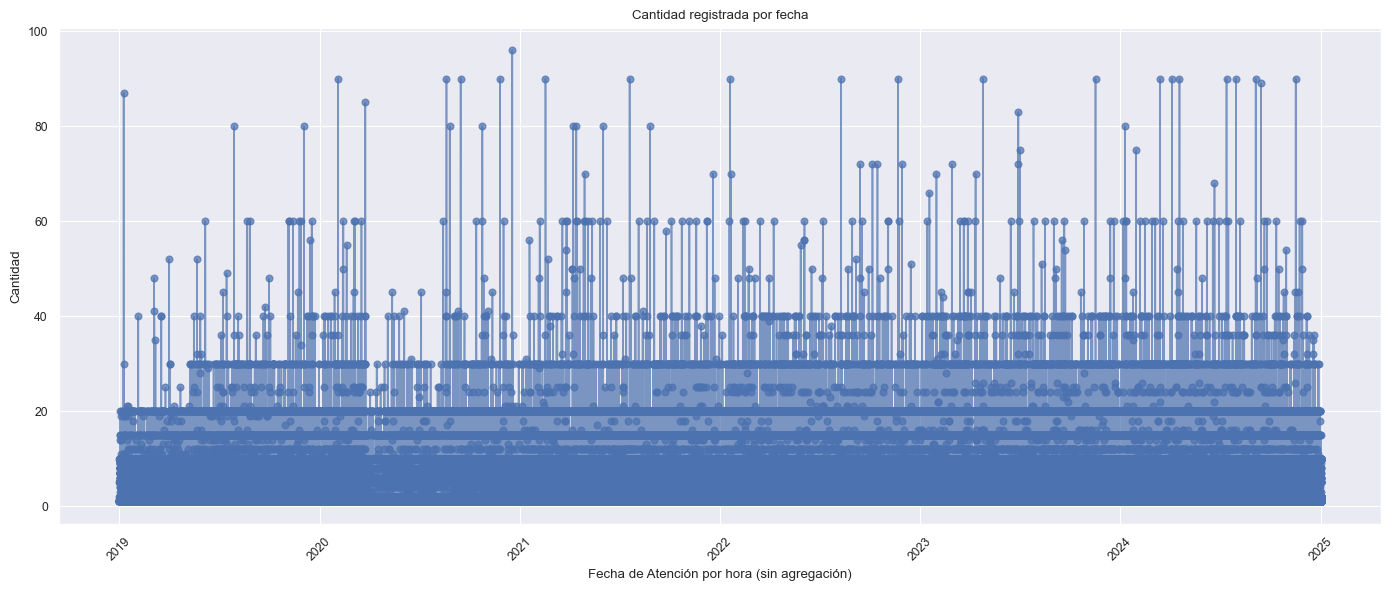

In [8]:
# Asegúrate de que la fecha esté en formato datetime
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Ordenar por fecha (opcional, mejora la visualización)
df10 = df10.sort_values('FECHA_ATENCION')

# Graficar
plt.figure(figsize=(14, 6))
plt.plot(df10['FECHA_ATENCION'], df10['Cantidad'], marker='o', linestyle='-', alpha=0.7)
plt.title('Cantidad registrada por fecha')
plt.xlabel('Fecha de Atención por hora (sin agregación)')
plt.ylabel('Cantidad')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### ¿Qué representa?

- Cada punto corresponde a un solo registro del DataFrame.

- Puede haber múltiples puntos para la misma fecha, uno por evento.

- Puede servir para analizar patrones individuales, variabilidad o ruido

### 📈 Interpretación:

- Se visualiza el comportamiento disperso y la distribución individual de los eventos.

- Útil para ver la variabilidad en la intensidad de cada registro.

- El gráfico no resume ni agrupa datos: muestra cada fila tal como está.

### 🔴 Limitación:

- Hay mucho ruido visual si tienes miles de eventos por día.

- No es bueno para ver tendencias generales.

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">3. Graficar directamente `FECHA_ATENCION` vs `Cantidad` por hora (con agregación)  📋 </p>  

### Tabla de frecuencias

Para que el gráfico sea con conteo diario agregado, solo se necesita agrupar por FECHA_ATENCION y sumar la Cantidad antes de graficar.

In [9]:
serie_diaria = df10.groupby('FECHA_ATENCION')['Cantidad'].sum().reset_index()
serie_diaria.head()

,FECHA_ATENCION,Cantidad
0,2019-01-01 00:00:00,29.0
1,2019-01-01 01:47:00,1.0
2,2019-01-01 03:25:00,1.0
3,2019-01-01 06:30:00,1.0
4,2019-01-01 06:35:00,1.0


In [10]:
filas, columnas = serie_diaria.shape
print(f"Número de filas: {filas}")
print(f"Número de columnas: {columnas}")

Número de filas: 3548019
Número de columnas: 2


### 🔍 ¿Qué está pasando?

- Tienes múltiples registros el mismo día, pero en horas diferentes (como `2019-01-01 00:00:00`, `2`019-01-01 01:47:00`, etc.)

- Como groupby(`FECHA_ATENCION`) considera la hora y minuto, no los agrupa juntos.

- Por eso el valor `29.0` en la primera fila es solo para `00:00:00`, y no representa todo el `1 de enero`.

### Primera forma

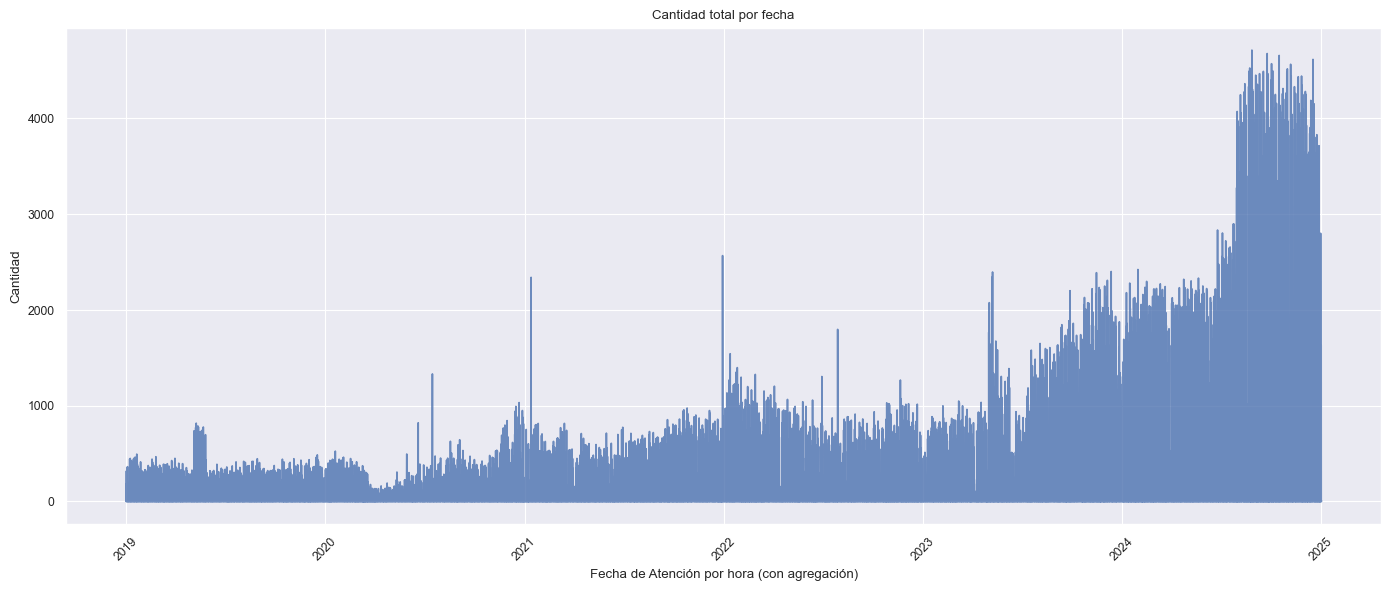

In [11]:
# Asegúrate de que la fecha esté en formato datetime
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Agrupar por fecha y sumar la cantidad
serie_diaria = df10.groupby('FECHA_ATENCION')['Cantidad'].sum().reset_index()

# Ordenar por fecha (opcional)
serie_hora = serie_diaria.sort_values('FECHA_ATENCION')

# Graficar
plt.figure(figsize=(14, 6))
plt.plot(serie_diaria['FECHA_ATENCION'], serie_diaria['Cantidad'], linestyle='-', alpha=0.8)
plt.title('Cantidad total por fecha')
plt.xlabel('Fecha de Atención por hora (con agregación)')
plt.ylabel('Cantidad')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###  Segunda forma

<Axes: xlabel='FECHA_ATENCION'>

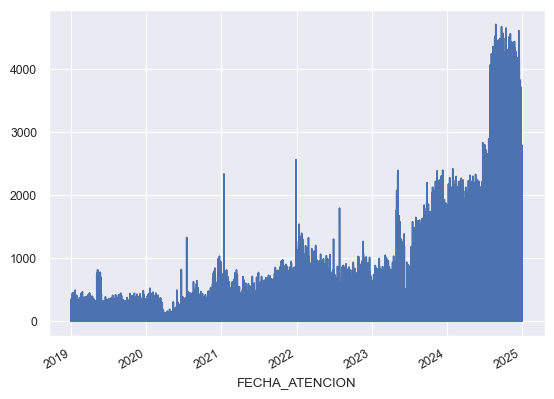

In [12]:
df10.groupby('FECHA_ATENCION')['Cantidad'].sum().plot()

### Tercera forma

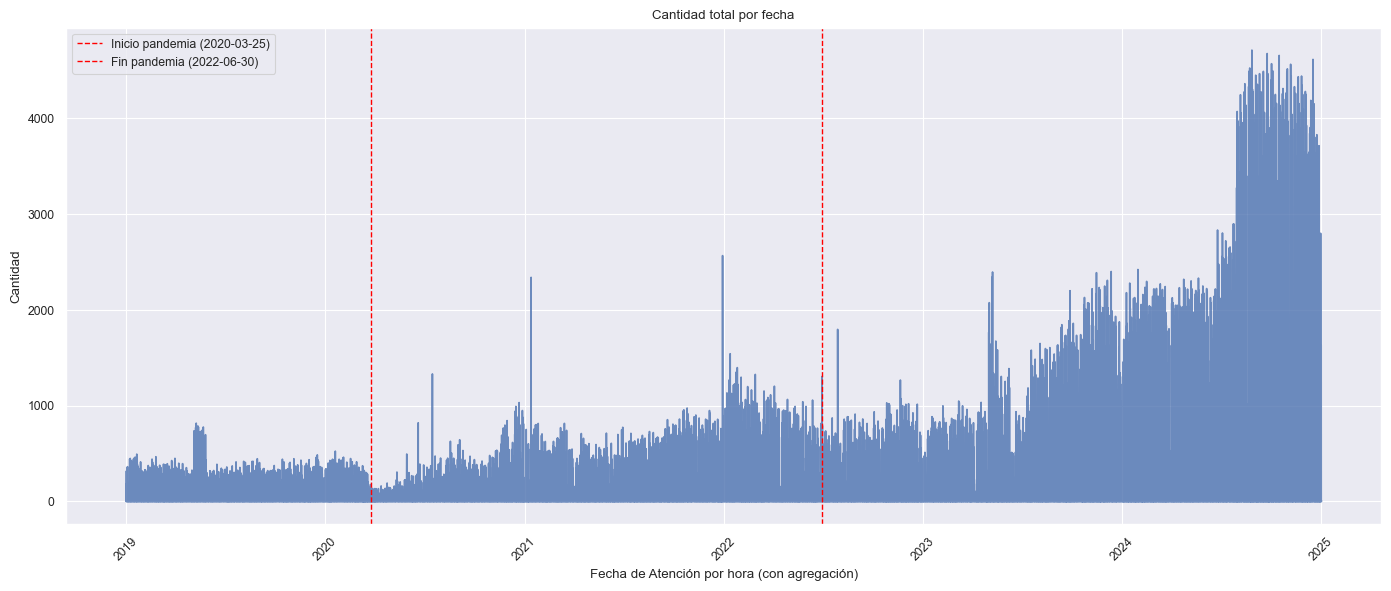

In [13]:
# Asegúrate de que la fecha esté en formato datetime
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Agrupar por fecha y sumar la cantidad
serie_diaria = df10.groupby('FECHA_ATENCION')['Cantidad'].sum().reset_index()

# Ordenar por fecha (opcional)
serie_diaria = serie_diaria.sort_values('FECHA_ATENCION')

# Graficar
plt.figure(figsize=(14, 6))
plt.plot(serie_diaria['FECHA_ATENCION'], serie_diaria['Cantidad'], linestyle='-', alpha=0.8)

# Líneas verticales rojas: inicio y fin de pandemia
plt.axvline(pd.to_datetime('2020-03-25'), color='red', linestyle='--', linewidth=1, label='Inicio pandemia (2020-03-25)')
plt.axvline(pd.to_datetime('2022-06-30'), color='red', linestyle='--', linewidth=1, label='Fin pandemia (2022-06-30)')

# Etiquetas y estilos
plt.title('Cantidad total por fecha')
plt.xlabel('Fecha de Atención por hora (con agregación)')
plt.ylabel('Cantidad')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


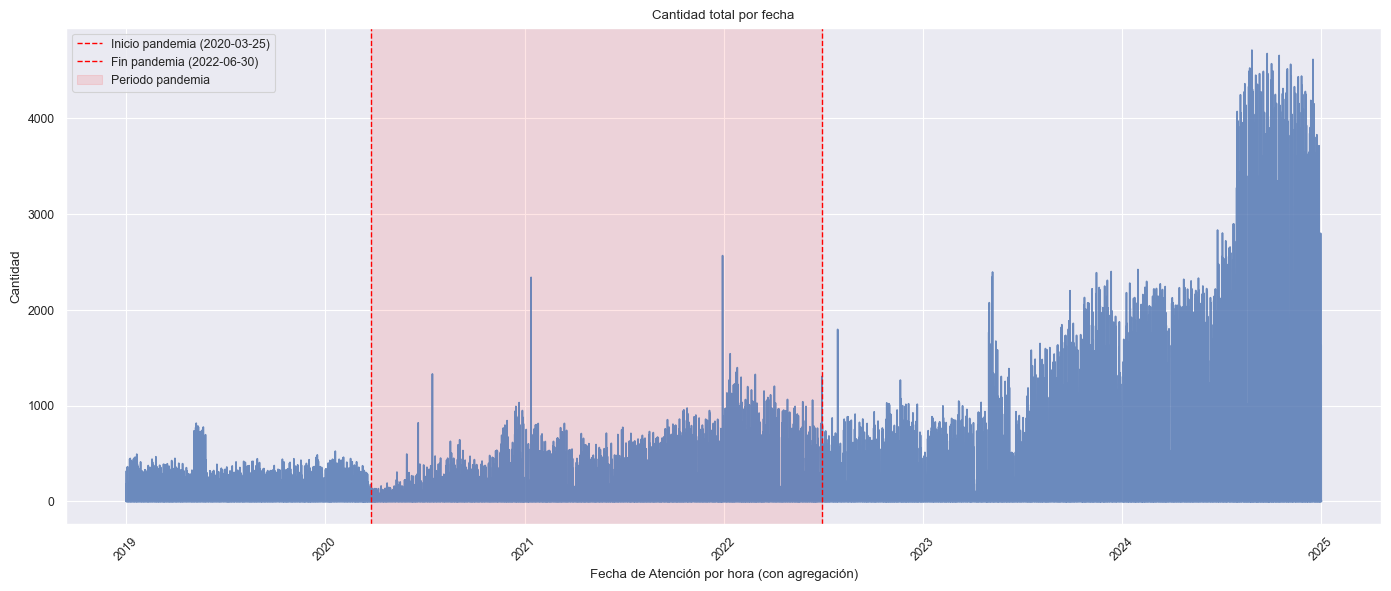

In [14]:
# Asegúrate de que la fecha esté en formato datetime
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Agrupar por fecha y sumar la cantidad
serie_diaria = df10.groupby('FECHA_ATENCION')['Cantidad'].sum().reset_index()

# Ordenar por fecha (opcional)
serie_diaria = serie_diaria.sort_values('FECHA_ATENCION')

# Fechas de pandemia
inicio_pandemia = pd.to_datetime('2020-03-25')
fin_pandemia = pd.to_datetime('2022-06-30')

# Graficar
plt.figure(figsize=(14, 6))
plt.plot(serie_diaria['FECHA_ATENCION'], serie_diaria['Cantidad'], linestyle='-', alpha=0.8)

# Líneas verticales
plt.axvline(inicio_pandemia, color='red', linestyle='--', linewidth=1, label='Inicio pandemia (2020-03-25)')
plt.axvline(fin_pandemia, color='red', linestyle='--', linewidth=1, label='Fin pandemia (2022-06-30)')

# Sombreado del periodo
plt.axvspan(inicio_pandemia, fin_pandemia, color='red', alpha=0.1, label='Periodo pandemia')

# Etiquetas y estilos
plt.title('Cantidad total por fecha')
plt.xlabel('Fecha de Atención por hora (con agregación)')
plt.ylabel('Cantidad')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### 🔍 Interpretación visual por partes

- 🟢 Tendencia general

    - Se observa una tendencia creciente desde 2019 hasta inicios de 2025.

    - Esto sugiere que el sistema, programa o fenómeno medido ha incrementado su actividad con el tiempo.

- 🔴 Picos esporádicos

    - Hay picos abruptos en ciertas fechas (valores fuera del patrón normal). Estos pueden corresponder a:

    - Jornadas especiales (campañas de atención, vacunaciones, etc.)

    - Eventos extraordinarios (crisis sanitaria, desastres, cambios normativos)

- 🔵 Caídas abruptas

    - También se observan valles o caídas, especialmente alrededor del inicio de 2020.

    - Podrían corresponder, por ejemplo, al inicio de la pandemia COVID-19 (25 de marzo de 2020 - 30 de junio de 2022) , cuando muchas actividades disminuyeron bruscamente.

- 🟠 Mayor volumen en los últimos años

    - A partir de 2023 y más aún en 2024–2025, los valores suben notablemente.

    - Puede deberse a una expansión del sistema, mejor capacidad de reporte, o aumento real en la demanda de servicios registrados.

### Qué representa?

- Agrupa todos los registros por fecha (FECHA_ATENCION) y suma la cantidad total del día.

- Cada punto del gráfico representa la suma total de atenciones por día.

### 📈 Interpretación:

- Permite ver claramente la evolución diaria en el tiempo.

- Útil para analizar:

- Tendencias (¿va en aumento o disminución?)

- Efectos estacionales o eventos puntuales (por ejemplo, pandemia)

- Días pico de atención

### ✅ Ventaja:

- Es más legible.

- Se presta mejor para análisis descriptivos y modelado de series temporales.


### 🧠 Se puede usar para:

- Analizar tendencia, ritmo, acumulación de eventos por fecha	

- Hacer modelado, predicción, descomposición

### 💡 Recomendación para el Data Challenge:

- Usa esta figura como base principal para análisis exploratorio y modelado. Luego, se puede:

- Graficar por semana o mes (resample('W') o resample('M'))

- Comparar municipios o tipos de atención

- Detectar eventos anómalos (picos y caídas)

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">3. Graficar directamente `FECHA_ATENCION` vs `Cantidad` por día (con agregación sin hora)  📋 </p> 

### Tabla de frecuencias

Se usará `.dt.date` para extraer solo la fecha y agrupar por ella. Ahora sí se verá una única fila por día, por ejemplo:

In [15]:
serie_diaria = df10.groupby(df10['FECHA_ATENCION'].dt.date)['Cantidad'].sum().reset_index()
serie_diaria.columns = ['FECHA', 'Cantidad']

In [16]:
serie_diaria.head(100)
#serie_diaria.tail(100)

,FECHA,Cantidad
0,2019-01-01,114.0
1,2019-01-02,4982.0
2,2019-01-03,5637.0
3,2019-01-04,4703.0
4,2019-01-05,1656.0
...,...,...
95,2019-04-06,2372.0
96,2019-04-07,297.0
97,2019-04-08,7636.0
98,2019-04-09,7482.0


In [17]:
#serie_diaria.head(100)
serie_diaria.tail(100)

,FECHA,Cantidad
2092,2024-09-23,11880.0
2093,2024-09-24,11130.0
2094,2024-09-25,10488.0
2095,2024-09-26,10463.0
2096,2024-09-27,9191.0
...,...,...
2187,2024-12-27,8431.0
2188,2024-12-28,2846.0
2189,2024-12-29,390.0
2190,2024-12-30,7358.0


In [18]:
filas, columnas = serie_diaria.shape
print(f"Número de filas: {filas}")
print(f"Número de columnas: {columnas}")

Número de filas: 2192
Número de columnas: 2


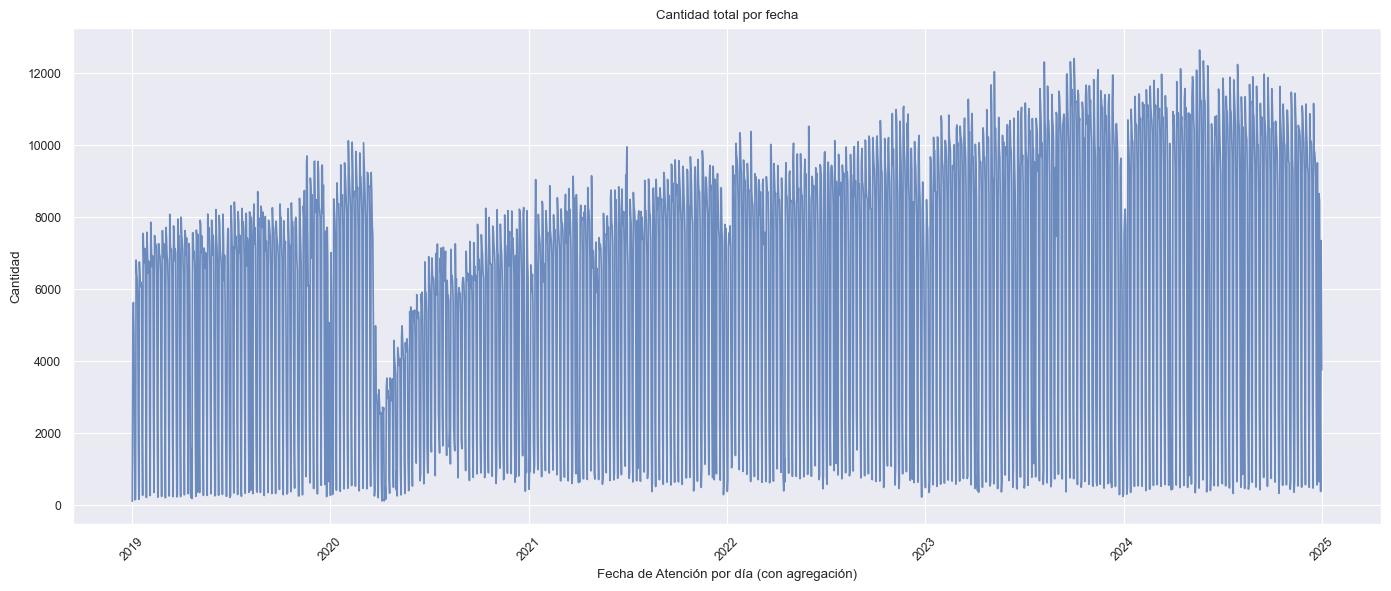

In [19]:
# Asegúrate de que la fecha esté en formato datetime
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Agrupar por día (sin hora) y sumar la cantidad
serie_diaria = df10.groupby(df10['FECHA_ATENCION'].dt.date)['Cantidad'].sum().reset_index()
serie_diaria.columns = ['FECHA', 'Cantidad']

# Convertir FECHA de nuevo a datetime para graficar correctamente
serie_diaria['FECHA'] = pd.to_datetime(serie_diaria['FECHA'])

# Ordenar por fecha
serie_diaria = serie_diaria.sort_values('FECHA')

# Graficar
plt.figure(figsize=(14, 6))
plt.plot(serie_diaria['FECHA'], serie_diaria['Cantidad'], linestyle='-', alpha=0.8)
plt.title('Cantidad total por fecha')
plt.xlabel('Fecha de Atención por día (con agregación)')
plt.ylabel('Cantidad')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

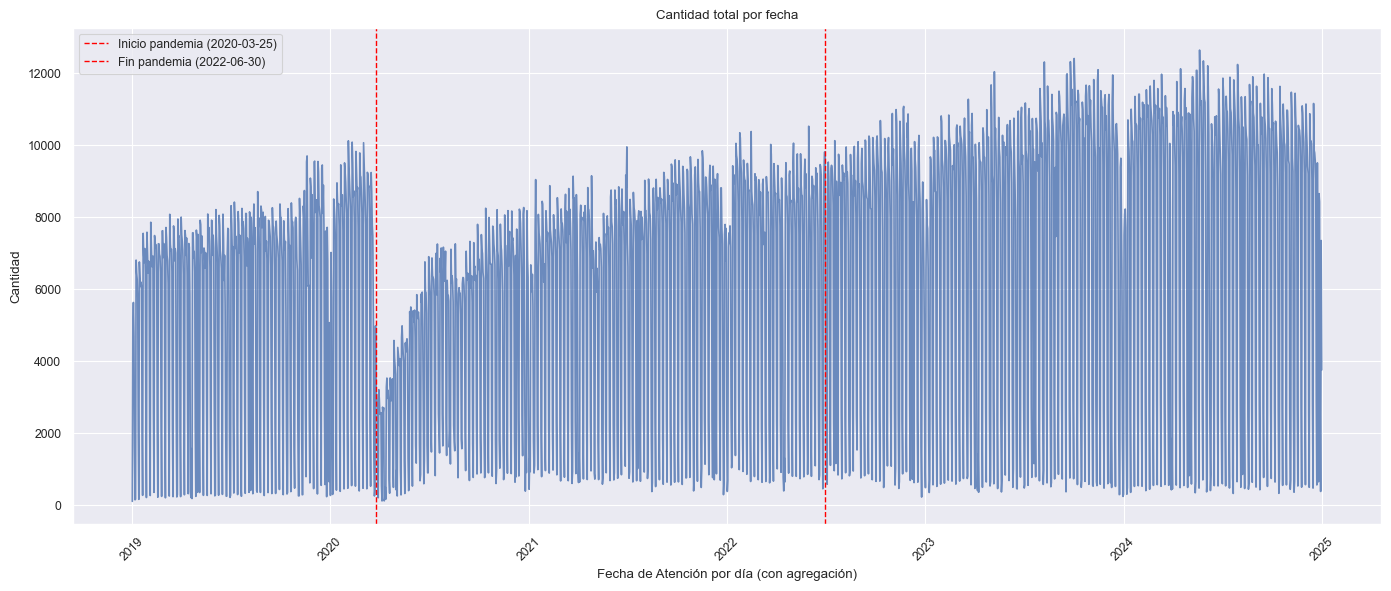

In [20]:
import pandas as pd 
import matplotlib.pyplot as plt

# Asegúrate de que la fecha esté en formato datetime
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Agrupar por día (sin hora) y sumar la cantidad
serie_diaria = df10.groupby(df10['FECHA_ATENCION'].dt.date)['Cantidad'].sum().reset_index()
serie_diaria.columns = ['FECHA', 'Cantidad']

# Convertir FECHA de nuevo a datetime para graficar correctamente
serie_diaria['FECHA'] = pd.to_datetime(serie_diaria['FECHA'])

# Ordenar por fecha
serie_diaria = serie_diaria.sort_values('FECHA')

# Graficar
plt.figure(figsize=(14, 6))
plt.plot(serie_diaria['FECHA'], serie_diaria['Cantidad'], linestyle='-', alpha=0.8)

# Añadir líneas verticales rojas
plt.axvline(pd.to_datetime('2020-03-25'), color='red', linestyle='--', linewidth=1, label='Inicio pandemia (2020-03-25)')
plt.axvline(pd.to_datetime('2022-06-30'), color='red', linestyle='--', linewidth=1, label='Fin pandemia (2022-06-30)')

# Estética del gráfico
plt.title('Cantidad total por fecha')
plt.xlabel('Fecha de Atención por día (con agregación)')
plt.ylabel('Cantidad')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


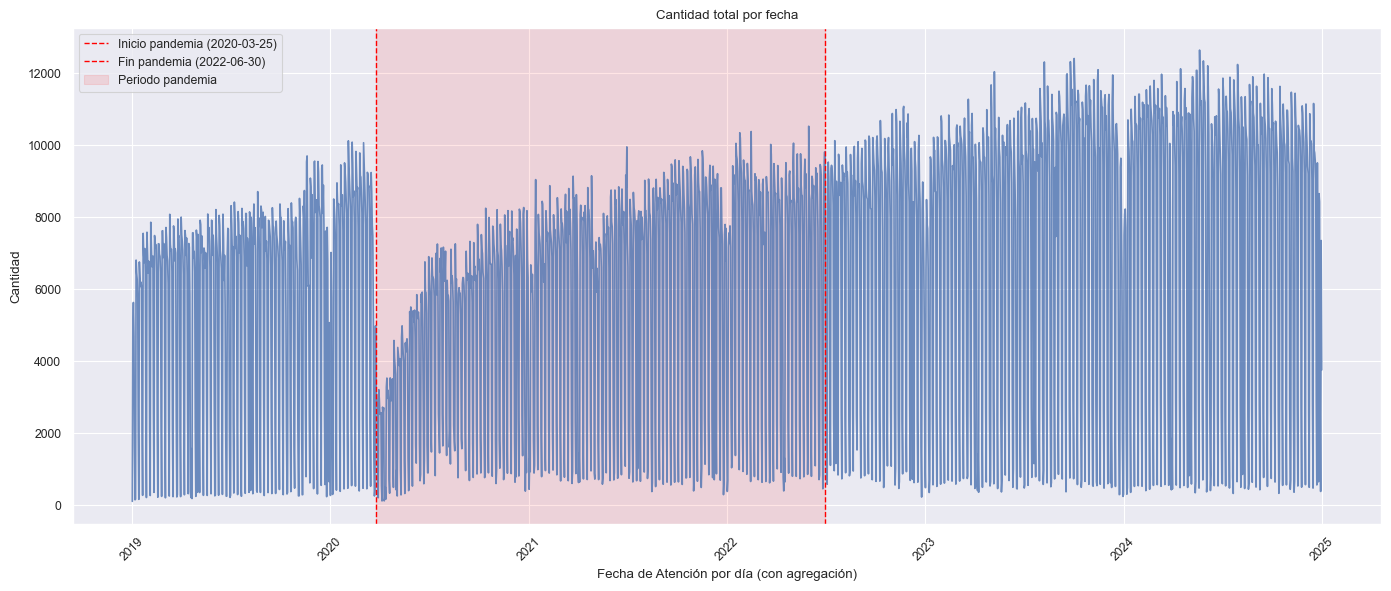

In [21]:
# Asegúrate de que la fecha esté en formato datetime
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Agrupar por día (sin hora) y sumar la cantidad
serie_diaria = df10.groupby(df10['FECHA_ATENCION'].dt.date)['Cantidad'].sum().reset_index()
serie_diaria.columns = ['FECHA', 'Cantidad']
serie_diaria['FECHA'] = pd.to_datetime(serie_diaria['FECHA'])

# Ordenar por fecha
serie_diaria = serie_diaria.sort_values('FECHA')

# Fechas clave
inicio_pandemia = pd.to_datetime('2020-03-25')
fin_pandemia = pd.to_datetime('2022-06-30')

# Graficar
plt.figure(figsize=(14, 6))
plt.plot(serie_diaria['FECHA'], serie_diaria['Cantidad'], linestyle='-', alpha=0.8)

# Líneas verticales
plt.axvline(inicio_pandemia, color='red', linestyle='--', linewidth=1, label='Inicio pandemia (2020-03-25)')
plt.axvline(fin_pandemia, color='red', linestyle='--', linewidth=1, label='Fin pandemia (2022-06-30)')

# Sombreado del período de pandemia
plt.axvspan(inicio_pandemia, fin_pandemia, color='red', alpha=0.1, label='Periodo pandemia')

# Estética del gráfico
plt.title('Cantidad total por fecha')
plt.xlabel('Fecha de Atención por día (con agregación)')
plt.ylabel('Cantidad')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### Explicación

- Cada punto representa la suma total por día, sin desagregarse por horas.

- El eje X tendrá un solo valor por fecha (por ejemplo: `2019-01-01`, `2019-01-02`, ...).

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">3. Graficar directamente `FECHA_ATENCION` vs `Cantidad` por semana (con agregación)  📋 </p>  

En la tabla, cada fila representará el total semanal de cantidad, con FECHA indicando el último día de la semana (domingo). El argumento `resample('W')` significa: "Agrupa todos los registros que caen en la misma semana (domingo a sábado)". Es decir, para cada semana, se sumaron todos los conteos diarios (`Cantidad`).

In [22]:
# Asegúrate de que la fecha esté en formato datetime
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Agrupar por semana y sumar la cantidad
serie_semanal = df10.set_index('FECHA_ATENCION').resample('W')['Cantidad'].sum().reset_index()
serie_semanal.columns = ['FECHA', 'Cantidad']

# Agrupar por semana y sumar la cantidad
serie_semanal 

,FECHA,Cantidad
0,2019-01-06,17249.0
1,2019-01-13,27720.0
2,2019-01-20,33816.0
3,2019-01-27,37515.0
4,2019-02-03,36978.0
...,...,...
309,2024-12-08,53246.0
310,2024-12-15,53456.0
311,2024-12-22,52942.0
312,2024-12-29,35765.0


<Axes: xlabel='FECHA_ATENCION'>

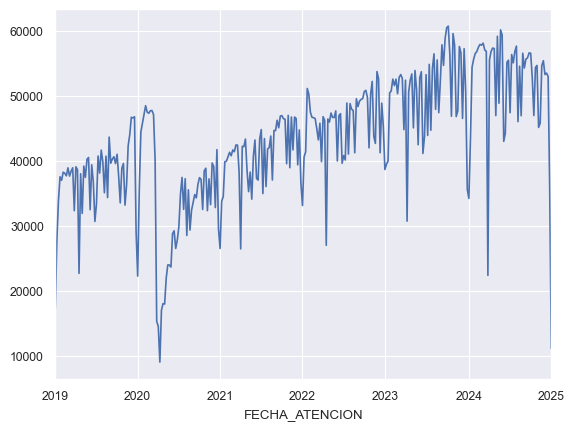

In [23]:
df10.set_index('FECHA_ATENCION').resample('W')['Cantidad'].sum().plot()

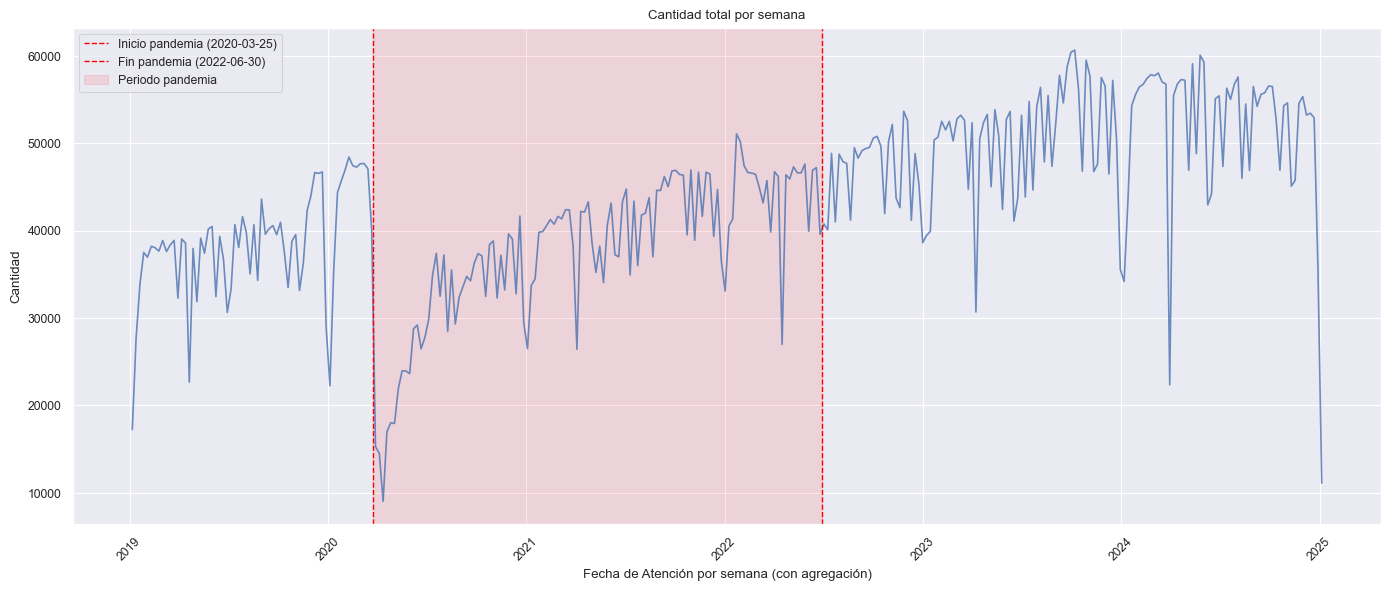

In [24]:
# Asegúrate de que la fecha esté en formato datetime
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Agrupar por semana y sumar la cantidad
serie_semanal = df10.set_index('FECHA_ATENCION').resample('W')['Cantidad'].sum().reset_index()
serie_semanal.columns = ['FECHA', 'Cantidad']

# Ordenar por fecha
serie_semanal = serie_semanal.sort_values('FECHA')

# Fechas clave
inicio_pandemia = pd.to_datetime('2020-03-25')
fin_pandemia = pd.to_datetime('2022-06-30')

# Graficar
plt.figure(figsize=(14, 6))
plt.plot(serie_semanal['FECHA'], serie_semanal['Cantidad'], linestyle='-', alpha=0.8)

# Líneas verticales
plt.axvline(inicio_pandemia, color='red', linestyle='--', linewidth=1, label='Inicio pandemia (2020-03-25)')
plt.axvline(fin_pandemia, color='red', linestyle='--', linewidth=1, label='Fin pandemia (2022-06-30)')

# Sombreado del período de pandemia
plt.axvspan(inicio_pandemia, fin_pandemia, color='red', alpha=0.1, label='Periodo pandemia')

# Estética del gráfico
plt.title('Cantidad total por semana')
plt.xlabel('Fecha de Atención por semana (con agregación)')
plt.ylabel('Cantidad')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">3. Graficar directamente `FECHA_ATENCION` vs `Cantidad` por mes (con agregación)  📋 </p>  

En la tabla de abajo, cada fila representa la suma total de eventos del mes completo y La columna FECHA marca el último día de cada mes por defecto.

In [25]:
# Asegúrate de que la fecha esté en formato datetime
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Agrupar por mes y sumar la cantidad
serie_mensual = df10.set_index('FECHA_ATENCION').resample('M')['Cantidad'].sum().reset_index()
serie_mensual.columns = ['FECHA', 'Cantidad']

serie_mensual

,FECHA,Cantidad
0,2019-01-31,144191.0
1,2019-02-28,152444.0
2,2019-03-31,156689.0
3,2019-04-30,153408.0
4,2019-05-31,171004.0
...,...,...
67,2024-08-31,226411.0
68,2024-09-30,234274.0
69,2024-10-31,240938.0
70,2024-11-30,212874.0


<Axes: xlabel='FECHA_ATENCION'>

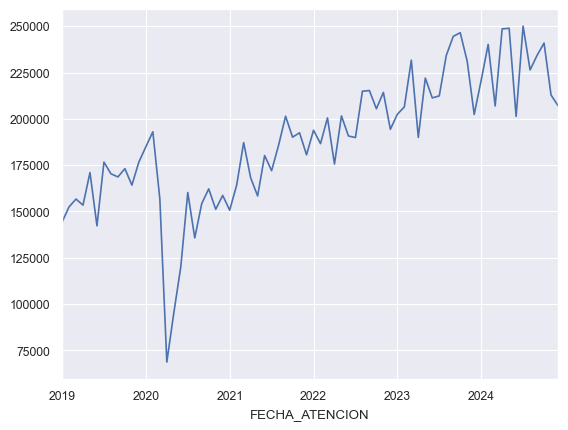

In [26]:
df10.set_index('FECHA_ATENCION').resample('M')['Cantidad'].sum().plot()

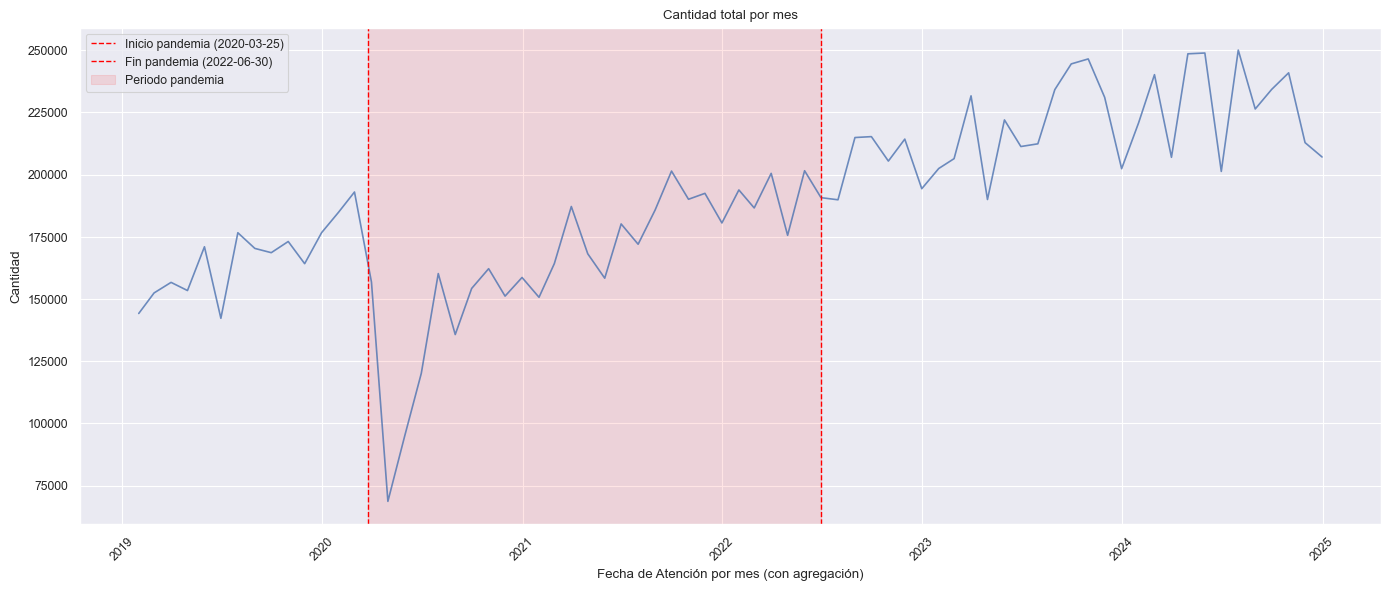

In [27]:
# Asegúrate de que la fecha esté en formato datetime
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Agrupar por mes y sumar la cantidad
serie_mensual = df10.set_index('FECHA_ATENCION').resample('M')['Cantidad'].sum().reset_index()
serie_mensual.columns = ['FECHA', 'Cantidad']

# Ordenar por fecha
serie_mensual = serie_mensual.sort_values('FECHA')

# Fechas clave de pandemia
inicio_pandemia = pd.to_datetime('2020-03-25')
fin_pandemia = pd.to_datetime('2022-06-30')

# Graficar
plt.figure(figsize=(14, 6))
plt.plot(serie_mensual['FECHA'], serie_mensual['Cantidad'], linestyle='-', alpha=0.8)

# Líneas verticales
plt.axvline(inicio_pandemia, color='red', linestyle='--', linewidth=1, label='Inicio pandemia (2020-03-25)')
plt.axvline(fin_pandemia, color='red', linestyle='--', linewidth=1, label='Fin pandemia (2022-06-30)')

# Sombreado del período de pandemia
plt.axvspan(inicio_pandemia, fin_pandemia, color='red', alpha=0.1, label='Periodo pandemia')

# Estética del gráfico
plt.title('Cantidad total por mes')
plt.xlabel('Fecha de Atención por mes (con agregación)')
plt.ylabel('Cantidad')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">3. Graficar directamente `FECHA_ATENCION` vs `Cantidad` por año (con agregación)  📋 </p>  

### 📌 Notas

- Las fechas (FECHA) son el último día del año (31 de diciembre).

- La sombra roja sigue activa y resalta los años 2020, 2021 y parte de 2022.

- Este gráfico es ideal para comparar el impacto de la pandemia a nivel anual, visualizando claramente los efectos en el volumen de eventos registrados.

In [28]:
# Asegúrate de que la fecha esté en formato datetime
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Agrupar por año y sumar la cantidad
serie_anual = df10.set_index('FECHA_ATENCION').resample('Y')['Cantidad'].sum().reset_index()
serie_anual.columns = ['FECHA', 'Cantidad']

serie_anual

,FECHA,Cantidad
0,2019-12-31,1949623.0
1,2020-12-31,1740888.0
2,2021-12-31,2131268.0
3,2022-12-31,2383136.0
4,2023-12-31,2635045.0
5,2024-12-31,2738499.0


<Axes: xlabel='FECHA_ATENCION'>

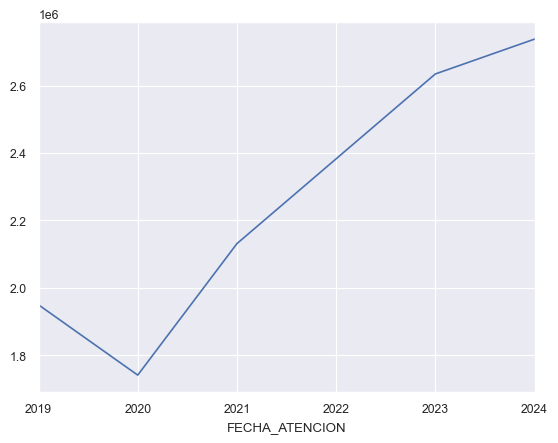

In [29]:
df10.set_index('FECHA_ATENCION').resample('Y')['Cantidad'].sum().plot()

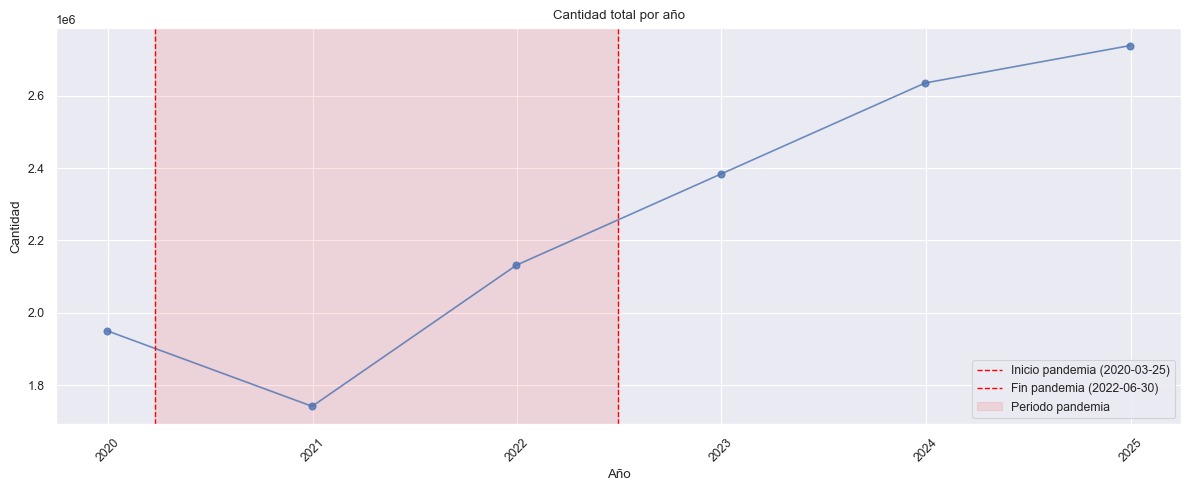

In [30]:
# Asegúrate de que la fecha esté en formato datetime
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Agrupar por año y sumar la cantidad
serie_anual = df10.set_index('FECHA_ATENCION').resample('Y')['Cantidad'].sum().reset_index()
serie_anual.columns = ['FECHA', 'Cantidad']

# Ordenar por fecha
serie_anual = serie_anual.sort_values('FECHA')

# Fechas clave de pandemia
inicio_pandemia = pd.to_datetime('2020-03-25')
fin_pandemia = pd.to_datetime('2022-06-30')

# Graficar
plt.figure(figsize=(12, 5))
plt.plot(serie_anual['FECHA'], serie_anual['Cantidad'], marker='o', linestyle='-', alpha=0.8)

# Líneas verticales
plt.axvline(inicio_pandemia, color='red', linestyle='--', linewidth=1, label='Inicio pandemia (2020-03-25)')
plt.axvline(fin_pandemia, color='red', linestyle='--', linewidth=1, label='Fin pandemia (2022-06-30)')

# Sombreado del período de pandemia
plt.axvspan(inicio_pandemia, fin_pandemia, color='red', alpha=0.1, label='Periodo pandemia')

# Estética del gráfico
plt.title('Cantidad total por año')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

<a id="5"></a>
# <p style="padding:10px;background-color:#4A235A ;margin:0;color:#E2EEF3;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Serie de tiempo por día  🔍</p> 

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Revisando la tabla de frecuencias por día  📋 </p>  

In [31]:
# Asegúrate de que la fecha esté en formato datetime
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Agrupar por fecha y sumar la cantidad
#serie_diaria = df10.groupby('FECHA_ATENCION')['Cantidad'].sum().reset_index()  # Por hora
serie_diaria = df10.groupby(df10['FECHA_ATENCION'].dt.date)['Cantidad'].sum()  # Por día

serie_diaria

FECHA_ATENCION
2019-01-01     114.0
2019-01-02    4982.0
2019-01-03    5637.0
2019-01-04    4703.0
2019-01-05    1656.0
               ...  
2024-12-27    8431.0
2024-12-28    2846.0
2024-12-29     390.0
2024-12-30    7358.0
2024-12-31    3765.0
Name: Cantidad, Length: 2192, dtype: float64

In [32]:
# Asegúrate de tener el DataFrame df10 cargado con las columnas 'FECHA_ATENCION' y 'Cantidad'
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Calcular serie diaria y media móvil
#serie_global = df10.groupby('FECHA_ATENCION')['Cantidad'].sum() # Por hora
serie_global = df10.groupby(df10['FECHA_ATENCION'].dt.date)['Cantidad'].sum() # Por día

serie_global

FECHA_ATENCION
2019-01-01     114.0
2019-01-02    4982.0
2019-01-03    5637.0
2019-01-04    4703.0
2019-01-05    1656.0
               ...  
2024-12-27    8431.0
2024-12-28    2846.0
2024-12-29     390.0
2024-12-30    7358.0
2024-12-31    3765.0
Name: Cantidad, Length: 2192, dtype: float64

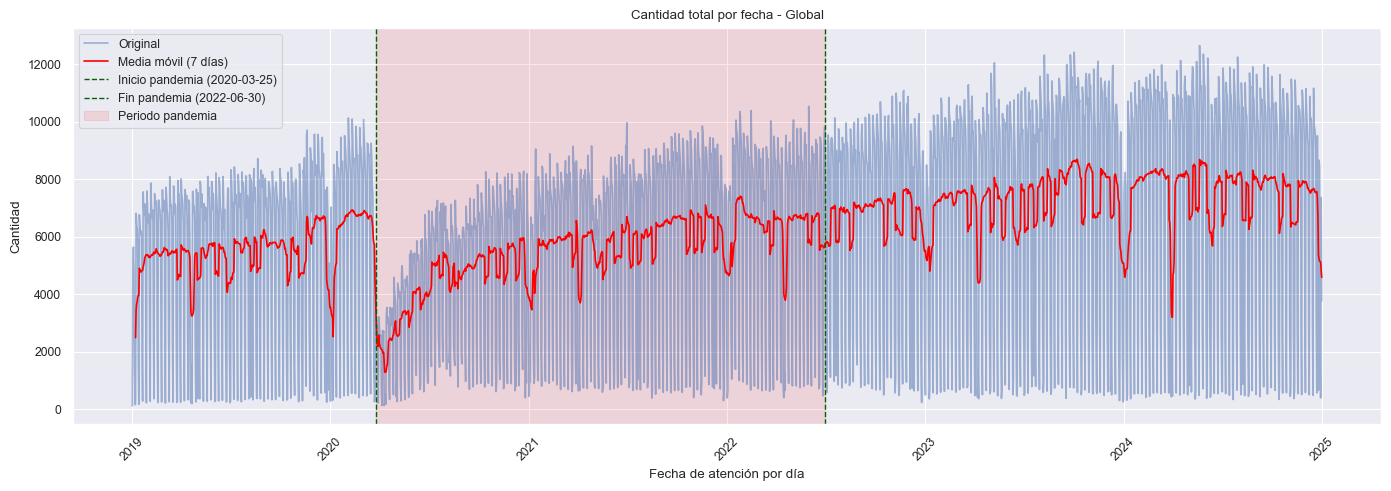

In [33]:
# Asegúrate de tener el DataFrame df10 cargado con las columnas 'FECHA_ATENCION' y 'Cantidad'
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Calcular serie diaria y media móvil
#serie_global = df10.groupby('FECHA_ATENCION')['Cantidad'].sum() # Por hora
serie_global = df10.groupby(df10['FECHA_ATENCION'].dt.date)['Cantidad'].sum()  # Por día

rolling_7 = serie_global.rolling(window=7).mean()

# Fechas del periodo de pandemia
inicio_pandemia = pd.to_datetime('2020-03-25')
fin_pandemia = pd.to_datetime('2022-06-30')

# Graficar
plt.figure(figsize=(14, 5))
plt.plot(serie_global.index, serie_global.values, label='Original', alpha=0.5)
plt.plot(rolling_7.index, rolling_7.values, label='Media móvil (7 días)', color='red')

# Líneas verticales y sombreado del periodo de pandemia
plt.axvline(inicio_pandemia, color='darkgreen', linestyle='--', linewidth=1, label='Inicio pandemia (2020-03-25)')
plt.axvline(fin_pandemia, color='darkgreen', linestyle='--', linewidth=1, label='Fin pandemia (2022-06-30)')
plt.axvspan(inicio_pandemia, fin_pandemia, color='red', alpha=0.1, label='Periodo pandemia')

# Detalles estéticos
plt.title('Cantidad total por fecha - Global')
plt.xlabel('Fecha de atención por día')
plt.ylabel('Cantidad')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 📊 ¿Qué muestra el gráfico?

- Curva azul (Original): Es la suma total diaria de eventos (Cantidad) registrados para cada FECHA_ATENCION. Muestra bastante variabilidad diaria.

- Curva roja (Media móvil de 7 días): Es un suavizado que permite observar la tendencia subyacente, eliminando ruido de corto plazo. Cada punto representa el promedio de los últimos 7 días.


### 🔍 ¿Cómo se interpreta?

- Tendencia general ascendente: Desde 2019 hasta 2025, la curva roja muestra un crecimiento notable, con un cambio claro post-pandemia.

- Picos aislados: La curva azul muestra algunos picos abruptos, que pueden corresponder a eventos anómalos, fallos de carga de datos o situaciones críticas (como campañas masivas de atención o siniestros).

- Pandemia y post-pandemia: Se podría notar:

    - Una caída durante el inicio de la pandemia (por restricciones)

    - Un rebote posterior (acumulación de casos o reactivación de servicios)

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Cambio estructural (antes vs. después pandemia)  📋 </p>  

In [34]:
# Convertir a datetime.date la fecha de comparación
fecha_corte = datetime.strptime('2020-03-25', '%Y-%m-%d').date()

# Separar series
pre = serie_global[serie_global.index < fecha_corte]
post = serie_global[serie_global.index >= fecha_corte]

# Verificar los primeros valores
print(pre.head())
print(post.head())

FECHA_ATENCION
2019-01-01     114.0
2019-01-02    4982.0
2019-01-03    5637.0
2019-01-04    4703.0
2019-01-05    1656.0
Name: Cantidad, dtype: float64
FECHA_ATENCION
2020-03-25    3051.0
2020-03-26    3085.0
2020-03-27    2802.0
2020-03-28     709.0
2020-03-29     215.0
Name: Cantidad, dtype: float64


In [35]:
from scipy.stats import ttest_ind
stat, p = ttest_ind(pre.dropna(), post.dropna())
print("p-valor:", p)

p-valor: 8.622603620475699e-06


La prueba t (ttest_ind) aplicada compara el promedio de eventos registrados antes y después del 25 de marzo de 2020, fecha que marca el inicio de la pandemia en Colombia.

📊 Hipótesis de la prueba t de Student (independiente)

- H₀ (hipótesis nula): No hay diferencia en el promedio diario de eventos antes y después de la pandemia (medias iguales).

- H₁ (hipótesis alternativa): Sí hay una diferencia significativa en los promedios diarios (las medias son distintas).

🔍 Resultado
- p-valor: 8.6e-06. Es decir, 0.000 (extremadamente bajo).

✅ Interpretación

- Con un p-valor tan pequeño (muy por debajo de cualquier umbral típico como 0.05 o incluso 0.001), se rechaza contundentemente la hipótesis nula.

🔴 Esto indica que el promedio diario de eventos cambió significativamente después del inicio de la pandemia.

In [36]:
print("Promedio antes:", pre.mean())
print("Promedio después:", post.mean())

Promedio antes: 5497.41425389755
Promedio después: 6374.136546184739


<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Cambio en la varianza (antes, durante y después de la pandemia) 📋 </p>  

In [37]:
from scipy.stats import levene, bartlett

# Asegúrate de que FECHA_ATENCION sea datetime
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Agrupar por fecha y sumar
serie_global = df10.groupby(df10['FECHA_ATENCION'].dt.date)['Cantidad'].sum()
serie_global

FECHA_ATENCION
2019-01-01     114.0
2019-01-02    4982.0
2019-01-03    5637.0
2019-01-04    4703.0
2019-01-05    1656.0
               ...  
2024-12-27    8431.0
2024-12-28    2846.0
2024-12-29     390.0
2024-12-30    7358.0
2024-12-31    3765.0
Name: Cantidad, Length: 2192, dtype: float64

El análisis evalúa si hubo cambios en la variabilidad (varianza) de los datos diarios antes, durante y después de la pandemia. 

🧠 Hipótesis de ambas pruebas (Levene y Bartlett)
- H₀ (hipótesis nula): Las varianzas de los tres periodos (pre, durante, post) son iguales.

- H₁ (hipótesis alternativa): Al menos una varianza es diferente (es decir, hubo un cambio en la variabilidad diaria).

In [38]:
# Asegúrate de que FECHA_ATENCION sea datetime
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Agrupar por fecha (sin hora) y sumar
serie_global = df10.groupby(df10['FECHA_ATENCION'].dt.date)['Cantidad'].sum()
serie_global.index = pd.to_datetime(serie_global.index)  # Convertir a datetime

# Definir periodos como datetime también
inicio = pd.to_datetime("2020-03-25")
fin = pd.to_datetime("2022-06-30")

# Separar periodos correctamente
pre = serie_global[serie_global.index < inicio]
durante = serie_global[(serie_global.index >= inicio) & (serie_global.index <= fin)]
post = serie_global[serie_global.index > fin]

# Aplicar pruebas de varianza
stat_lev, p_lev = levene(pre, durante, post)
stat_bart, p_bart = bartlett(pre, durante, post)

# Mostrar resultados
print(f"Levene: p-value = {p_lev:.4f}")
print(f"Bartlett: p-value = {p_bart:.4f}")

Levene: p-value = 0.0000
Bartlett: p-value = 0.0000


✅ Interpretación

- Existe evidencia estadísticamente significativa para afirmar que la variabilidad (fluctuación) diaria de la cantidad cambió durante la pandemia. 


En otras palabras:

⚠️ No solo cambió el promedio diario, sino también la dispersión o estabilidad del comportamiento diario.

### 📌 ¿Qué sigue?

Explorar cuál periodo tiene mayor varianza, por ejemplo con:

In [39]:
print("Pre:", pre.var())
print("Durante:", durante.var())
print("Post:", post.var())

Pre: 10045040.185153518
Durante: 10154525.093031673
Post: 17435831.54616589


In [40]:
# Asegurarse de que FECHA_ATENCION sea tipo datetime
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Agrupar por fecha (sin hora) y sumar cantidades
serie_global = df10.groupby(df10['FECHA_ATENCION'].dt.date)['Cantidad'].sum()
#serie_global = df10.groupby(df10['FECHA_ATENCION'])['Cantidad'].sum()
serie_global

FECHA_ATENCION
2019-01-01     114.0
2019-01-02    4982.0
2019-01-03    5637.0
2019-01-04    4703.0
2019-01-05    1656.0
               ...  
2024-12-27    8431.0
2024-12-28    2846.0
2024-12-29     390.0
2024-12-30    7358.0
2024-12-31    3765.0
Name: Cantidad, Length: 2192, dtype: float64

Como la varianza durante la pandemia es mucho mayor, podríamos concluir que el sistema (o atención médica) se volvió más inestable o impredecible en ese tiempo.

El gráfico de abajo permitirá visualizar no solo los promedios diarios en cada etapa, sino también cuán consistentes o variables fueron esos promedios.

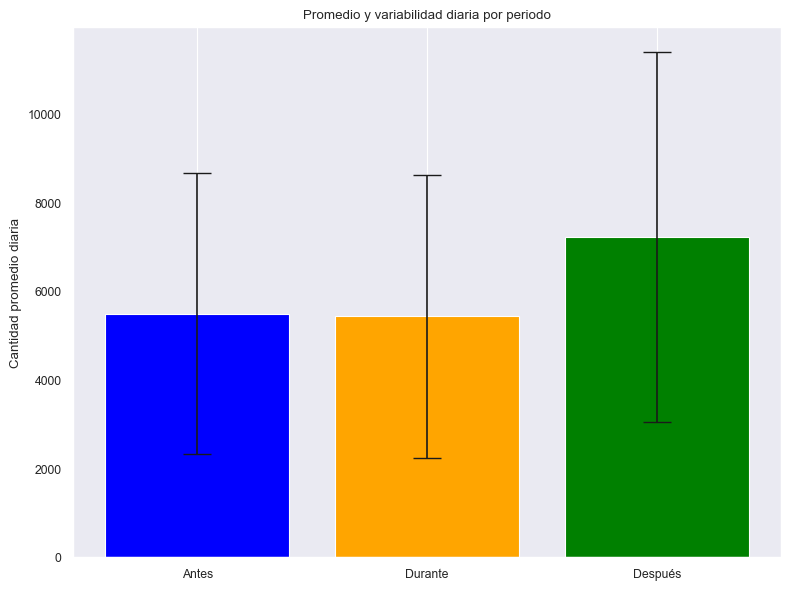

In [41]:
# Asegurarse de que FECHA_ATENCION sea tipo datetime
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Agrupar por fecha (sin hora) y sumar cantidades
serie_global = df10.groupby(df10['FECHA_ATENCION'].dt.date)['Cantidad'].sum()  # Por día
#serie_global = df10.groupby(df10['FECHA_ATENCION'])['Cantidad'].sum()  # Por hora
serie_global.index = pd.to_datetime(serie_global.index)  # Convertir índice a datetime

# Definir periodos
inicio = pd.to_datetime("2020-03-25")
fin = pd.to_datetime("2022-06-30")

# Separar las series por periodo
pre = serie_global[serie_global.index < inicio]
durante = serie_global[(serie_global.index >= inicio) & (serie_global.index <= fin)]
post = serie_global[serie_global.index > fin]

# Calcular medias y desviaciones estándar
labels = ['Antes', 'Durante', 'Después']
medias = [pre.mean(), durante.mean(), post.mean()]
stds = [pre.std(), durante.std(), post.std()]

# Crear gráfico de barras con barras de error (desviación estándar)
plt.figure(figsize=(8, 6))
plt.bar(labels, medias, yerr=stds, capsize=10, color=['blue', 'orange', 'green'])
plt.title('Promedio y variabilidad diaria por periodo')
plt.ylabel('Cantidad promedio diaria')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Interpretación del gráfico

- El gráfico de barras con líneas de error muestra el promedio diario de eventos registrados en tres periodos: antes, durante y después de la pandemia. 

- Las barras representan el valor promedio de la variable `Cantidad` en cada periodo, mientras que las líneas verticales (barras de error) indican la variabilidad de esos valores a través de su desviación estándar. 

- Aunque los promedios parecen similares entre los tres periodos, la variabilidad se incrementa drásticamente después de la pandemia, como se observa en la línea más larga en el periodo `Después`. 

- Esto sugiere que, aunque el número promedio de registros diarios se mantuvo relativamente estable, la inconsistencia o dispersión en los datos aumentó considerablemente tras la pandemia, lo que podría estar asociado a cambios estructurales o de comportamiento en el sistema de atención.

In [42]:
# Asegurarse de que FECHA_ATENCION sea tipo datetime
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Agrupar por fecha (sin hora) y sumar cantidades
serie_global = df10.groupby(df10['FECHA_ATENCION'].dt.date)['Cantidad'].sum()  # Por día
#serie_global = df10.groupby(df10['FECHA_ATENCION'])['Cantidad'].sum()  # Por hora

serie_global

FECHA_ATENCION
2019-01-01     114.0
2019-01-02    4982.0
2019-01-03    5637.0
2019-01-04    4703.0
2019-01-05    1656.0
               ...  
2024-12-27    8431.0
2024-12-28    2846.0
2024-12-29     390.0
2024-12-30    7358.0
2024-12-31    3765.0
Name: Cantidad, Length: 2192, dtype: float64

### Hipótesis

Hipótesis nula (H₀): La serie no es estacionaria (tiene raíz unitaria).

Hipótesis alternativa (H₁): La serie es estacionaria.


### ¿Para qué sirve?

Verifica si tu serie es estacionaria (es decir, si sus propiedades estadísticas no cambian en el tiempo).

✅ Si el p-valor < 0.05, la serie es estacionaria.  En este caso, SI lo es. 

In [43]:
# Asegurarse de que FECHA_ATENCION sea tipo datetime
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Agrupar por fecha (sin hora) y sumar cantidades
serie_global = df10.groupby(df10['FECHA_ATENCION'].dt.date)['Cantidad'].sum()  # Por día
#serie_global = df10.groupby(df10['FECHA_ATENCION'])['Cantidad'].sum()  # Por hora

#La prueba de Dickey-Fuller aumentada
from statsmodels.tsa.stattools import adfuller

resultado_adf = adfuller(serie_global.dropna())
print(f'Estadístico ADF: {resultado_adf[0]:.4f}')
print(f'p-valor: {resultado_adf[1]:.4f}')

Estadístico ADF: -3.9977
p-valor: 0.0014


### Interpretación

- La prueba de Dickey-Fuller aumentada (ADF) aplicada a la serie temporal de la variable Cantidad muestra un estadístico ADF de -3.9977 y un valor-p de 0.0014. 

- Este valor-p es significativamente menor al nivel de significancia común (por ejemplo, 0.05), lo que nos permite rechazar la hipótesis nula de que la serie tiene una raíz unitaria. Es decir, rechazamos la idea de que no es estacionaria. 

- En consecuencia, se concluye que la serie temporal es estacionaria, lo cual significa que sus propiedades estadísticas (como la media y la varianza) se mantienen constantes a lo largo del tiempo. 

- Esta característica es fundamental para la aplicación de modelos de series temporales más avanzados como ARIMA.

In [44]:
from statsmodels.tsa.stattools import adfuller

def interpretar_adf(serie, nombre):
    resultado = adfuller(serie.dropna())
    estadistico = resultado[0]
    pvalor = resultado[1]
    print(f"Resultados ADF - {nombre}")
    print("===================================")
    print(f"Estadístico ADF: {estadistico:.4f}")
    print(f"Valor p: {pvalor:.4f}")
    if pvalor < 0.05:
        print("✅ Rechazamos H₀ → La serie es estacionaria.\n")
    else:
        print("❌ No se rechaza H₀ → La serie NO es estacionaria.\n")

# Aplicar ADF a la serie original y sus diferencias
interpretar_adf(serie_global, "Serie Original")
interpretar_adf(serie_global.diff(), "Primera Diferencia")
interpretar_adf(serie_global.diff().diff(), "Segunda Diferencia")

Resultados ADF - Serie Original
Estadístico ADF: -3.9977
Valor p: 0.0014
✅ Rechazamos H₀ → La serie es estacionaria.

Resultados ADF - Primera Diferencia
Estadístico ADF: -15.1719
Valor p: 0.0000
✅ Rechazamos H₀ → La serie es estacionaria.

Resultados ADF - Segunda Diferencia
Estadístico ADF: -18.2211
Valor p: 0.0000
✅ Rechazamos H₀ → La serie es estacionaria.



La prueba de Dickey-Fuller aumentada (ADF) fue aplicada a la serie original 'Cantidad', así como a sus primeras y segundas diferencias, con el propósito de evaluar su estacionariedad. Los resultados obtenidos muestran que la serie original ya es estacionaria, dado que el valor del estadístico ADF fue de -3.9977 y el valor p correspondiente fue 0.0014. Este valor p es inferior al umbral de significancia del 5%, lo que permite rechazar la hipótesis nula de no estacionariedad. En consecuencia, no es necesario aplicar diferenciación para estabilizar la media del proceso.

Cuando se aplicó la primera diferencia, el estadístico ADF alcanzó un valor de -15.1719, con un valor p de 0.0000, confirmando también la estacionariedad de la serie transformada. Sin embargo, dado que la serie original ya era estacionaria, esta transformación no es estrictamente necesaria, aunque sí reafirma la estabilidad del comportamiento a través del tiempo.

Por último, la segunda diferencia arrojó un estadístico ADF de -18.2211 con un valor p de 0.0000. Aunque estos resultados también reflejan una serie estacionaria, aplicar una segunda diferenciación puede resultar en una sobrediferenciación que elimine componentes estructurales útiles para el modelado. Esto podría reducir la capacidad del modelo para capturar patrones relevantes presentes en los datos originales.

En síntesis, la serie `Cantidad` es estacionaria desde su forma original, por lo que es apropiado utilizar un modelo ARIMA con parámetro de diferenciación d=0. Evitar diferenciaciones innecesarias mejora la precisión del modelo y simplifica su interpretación.

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">⚙️ Dickey-Fuller y Prueba de nortmalidad (código de Keyla Alba) 📋 </p>  

Prueba de Dickey-Fuller Aumentada (ADF) - Residuos
Estadístico ADF: -19.3133
Valor p: 0.0000
Se rechaza H₀ → Los residuos son estacionarios.

Prueba de Shapiro-Wilk - Normalidad de los Residuos
Estadístico: 0.8390
Valor p: 0.0000
H₀: Los residuos siguen una distribución normal
H₁: Los residuos NO siguen una distribución normal
Se rechaza H₀ → Los residuos no son normales.



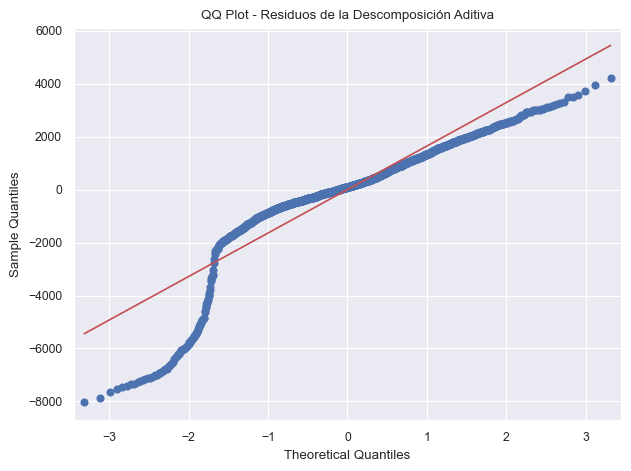

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from scipy.stats import shapiro
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Asegurarse de que FECHA_ATENCION sea tipo datetime
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Agrupar por fecha (sin hora) y sumar cantidades
serie_global = df10.groupby(df10['FECHA_ATENCION'].dt.date)['Cantidad'].sum()  # Por día
#serie_global = df10.groupby(df10['FECHA_ATENCION'])['Cantidad'].sum()  # Por hora

# Descomposición aditiva (si no la has hecho)
descomposicion = seasonal_decompose(serie_global, model='additive', period=7)
resid = descomposicion.resid.dropna()

# Prueba de Dickey-Fuller Aumentada (ADF) sobre los residuos
adf_result = adfuller(resid)
print("Prueba de Dickey-Fuller Aumentada (ADF) - Residuos")
print(f"Estadístico ADF: {adf_result[0]:.4f}")
print(f"Valor p: {adf_result[1]:.4f}")
if adf_result[1] < 0.05:
    print("Se rechaza H₀ → Los residuos son estacionarios.\n")
else:
    print("No se puede rechazar H₀ → Los residuos no son estacionarios.\n")

# Prueba de normalidad de Shapiro-Wilk
shapiro_test = shapiro(resid)
print("Prueba de Shapiro-Wilk - Normalidad de los Residuos")
print(f"Estadístico: {shapiro_test.statistic:.4f}")
print(f"Valor p: {shapiro_test.pvalue:.4f}")
print("H₀: Los residuos siguen una distribución normal")
print("H₁: Los residuos NO siguen una distribución normal")
if shapiro_test.pvalue < 0.05:
    print("Se rechaza H₀ → Los residuos no son normales.\n")
else:
    print("No se rechaza H₀ → Los residuos pueden considerarse normales.\n")

# QQ Plot para visualizar la normalidad de los residuos
sm.qqplot(resid, line='s')
plt.title("QQ Plot - Residuos de la Descomposición Aditiva")
plt.grid(True)
plt.tight_layout()
plt.show()

**Prueba de Dickey-Fuller Aumentada (ADF) - Residuos**

El valor del estadístico ADF es -19.3133 y el valor p es 0.0000. Esto indica que se rechaza la hipótesis nula (H₀) de que los residuos presentan una raíz unitaria, es decir, de que no son estacionarios. Por lo tanto, se concluye que los residuos sí son estacionarios, lo cual es un requisito importante para validar un modelo ARIMA. En este sentido, el comportamiento de los residuos no presenta una tendencia sistemática y fluctúa alrededor de una media constante con varianza constante en el tiempo.

**Prueba de Shapiro-Wilk - Normalidad de los Residuos**

El estadístico de Shapiro-Wilk es 0.8390 y el valor p es 0.0000. En este caso, se rechaza la hipótesis nula (H₀) de que los residuos siguen una distribución normal. Es decir, los residuos no se distribuyen normalmente, lo que puede indicar la presencia de asimetría, valores extremos (outliers), o colas pesadas.

**Conclusión General**

Aunque los residuos del modelo son estacionarios (lo cual es una condición deseable en modelos ARIMA para garantizar que las predicciones no estén sesgadas), no cumplen con el supuesto de normalidad, lo que podría limitar algunas inferencias estadísticas asociadas al modelo. Sin embargo, en muchos casos prácticos, la no normalidad de los residuos no invalida el modelo predictivo, especialmente si los residuos no presentan autocorrelación y tienen media cercana a cero. No obstante, este hallazgo puede justificar una exploración más profunda, como aplicar transformaciones (por ejemplo, logarítmica) o considerar modelos robustos si se requiere mayor precisión en la estimación de intervalos de confianza.

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">🔁 Modelo multiplicativo (código de Keyla ALba) 📋 </p>  

La descomposición multiplicativa de la serie temporal `Cantidad` permite identificar la estructura interna de la serie al dividirla en sus componentes: tendencia, estacionalidad y residuo. A diferencia de la descomposición aditiva, esta técnica asume que las fluctuaciones estacionales y aleatorias son proporcionales al nivel de la serie, por lo cual se usa cuando la variabilidad aumenta con el tiempo.

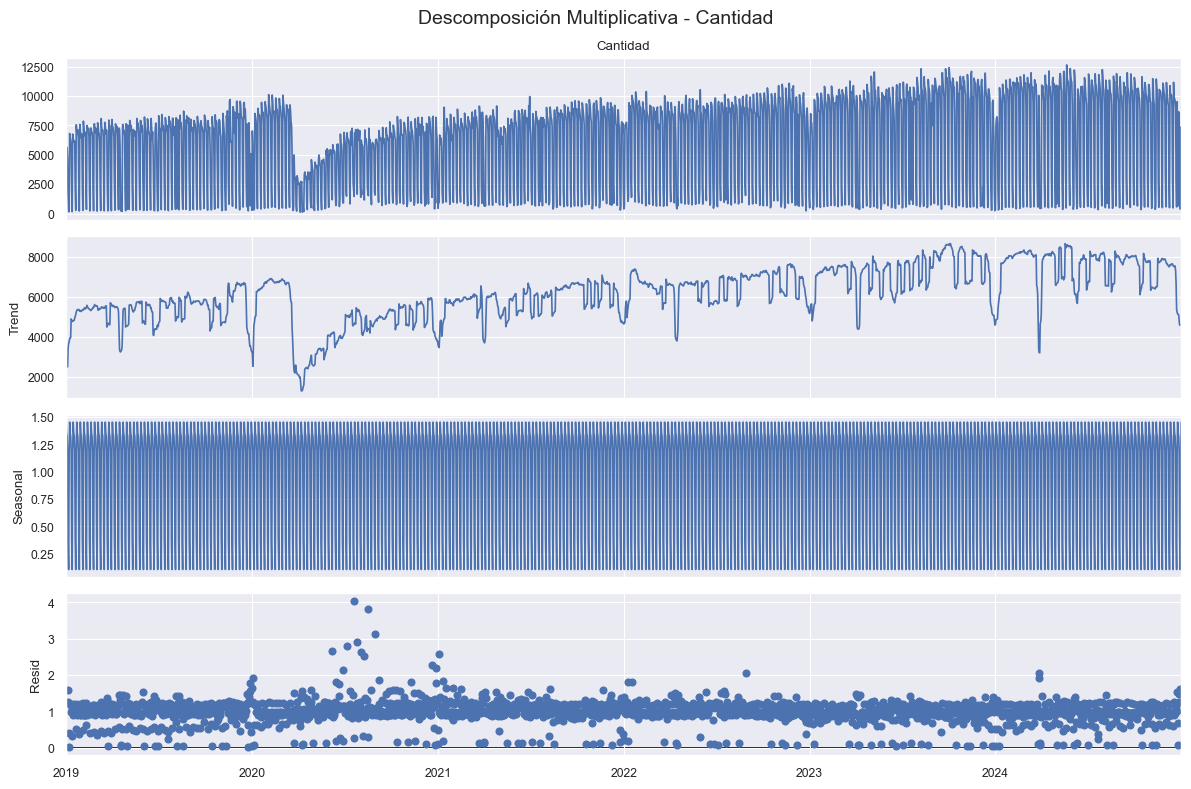

In [46]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Asegúrate de que el índice esté en datetime y con frecuencia diaria
serie = serie_global.copy()
serie.index = pd.to_datetime(serie.index)
serie = serie.asfreq('D')  # establece frecuencia diaria
serie = serie.interpolate(method='linear')  # rellena valores faltantes si hay

# Descomposición estacional multiplicativa
decompose_mult = seasonal_decompose(serie, model='multiplicative', period=7)  # puedes ajustar el periodo según la estacionalidad esperada

# Visualización
fig_mult = decompose_mult.plot()
fig_mult.set_size_inches(12, 8)
fig_mult.suptitle('Descomposición Multiplicativa - Cantidad', fontsize=14)
plt.tight_layout()
plt.show()

### 🔍 Interpretación de los resultados

1. Serie observada:
La serie original muestra un comportamiento altamente fluctuante, con niveles de "Cantidad" que se incrementan progresivamente a lo largo del tiempo. Se observan ciclos irregulares, caídas puntuales abruptas (como las de 2020 y 2023), y una variabilidad que parece aumentar en los años más recientes. Esto sugiere una relación no lineal entre la tendencia y las variaciones.

2. Componente de tendencia:
La tendencia suavizada revela una estructura creciente a lo largo del tiempo, aunque interrumpida por caídas notables. Esta evolución estructural indica cambios importantes en la dinámica de los eventos observados, posiblemente por factores externos como cambios normativos, choques sanitarios o administrativos que afectaron el comportamiento.

3. Componente estacional:
La estacionalidad en el modelo multiplicativo se expresa como proporciones del nivel de la serie, y en este caso, oscila entre valores cercanos a 0.2 y 1.5, lo que implica que las variaciones estacionales tienen un efecto relativo importante y constante sobre el total. Este patrón sugiere la presencia de ciclos repetitivos diarios o semanales (dado el periodo utilizado), reflejando posiblemente comportamientos institucionales, laborales o de atención periódica.

4. Componente residual:
Los residuos muestran valores concentrados en torno a 1, aunque existen picos que superan los valores normales (hasta ~4), indicando eventos no explicados ni por la tendencia ni por la estacionalidad. Esto puede deberse a alteraciones abruptas, errores de registro o eventos atípicos.

### 📌 ¿Para qué se hace esta prueba?

Esta descomposición es clave para determinar el tipo de modelo a utilizar en el análisis y pronóstico de series temporales:

- Si las variaciones estacionales son proporcionales al nivel (como en este caso), entonces el modelo multiplicativo es adecuado.

- Si las variaciones estacionales fueran independientes del nivel de la serie, entonces un modelo aditivo sería preferible.

Además, separar los componentes permite identificar claramente si existen cambios estructurales, patrones repetitivos y anomalías, lo cual mejora la interpretación y la selección de modelos como ARIMA, SARIMA o modelos de suavizamiento exponencial.

### ✅ 2. Comportamiento de la serie y descomposición:

- La descomposición aditiva mostró estacionalidad no proporcional al nivel de la serie y residuos centrados en cero, lo que sugiere buen ajuste.

- La descomposición multiplicativa, en cambio, mostró estacionalidad proporcional (variaciones entre 0.2 y 1.5) y residuos multiplicativos en torno a 1. Esto no es coherente con una serie estacionaria.

### 👉 Conclusión: 

El modelo aditivo es más apropiado para representar la estructura de la serie.




<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">🔁 Autocorrelación y Autocorrelación Parcial 📋 </p>  

¿Para qué sirve?

Detecta dependencias entre valores pasados. Te ayuda a definir parámetros para ARIMA (AR, MA, etc.).

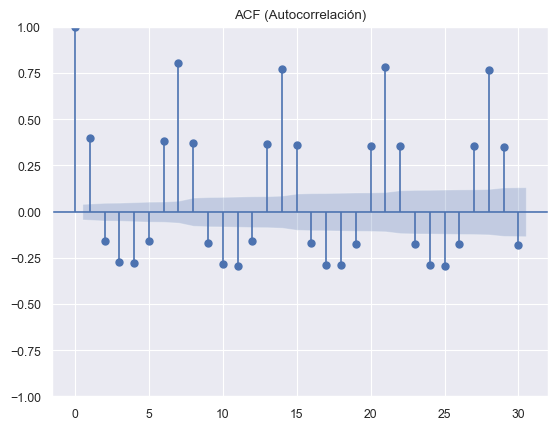

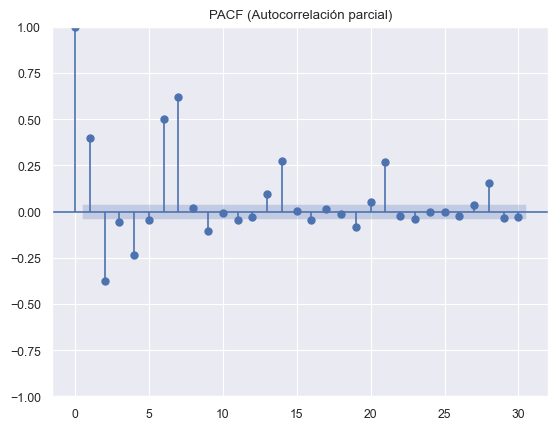

In [47]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(serie_global.dropna(), lags=30)
plt.title("ACF (Autocorrelación)")
plt.show()

plot_pacf(serie_global.dropna(), lags=30)
plt.title("PACF (Autocorrelación parcial)")
plt.show()

### 🔢 Interpretación

- Las gráficas de ACF (Autocorrelación) y PACF (Autocorrelación Parcial) permiten explorar la estructura temporal de la serie. 

- En la primera gráfica (ACF), se observa una autocorrelación significativa en varios rezagos, lo cual sugiere que los valores actuales están correlacionados con los valores de días anteriores, indicando persistencia en el comportamiento de la serie. 

    - Se observa que ACF decae lentamente → evidencia de componente MA.

- La segunda gráfica (PACF) muestra que la autocorrelación parcial es significativa en los primeros rezagos (especialmente en los primeros cinco días), lo que sugiere que un modelo autorregresivo (AR) de bajo orden podría ser adecuado para modelar la serie. 

    - Con PACF se observa un  corte después de lag 2 → evidencia de componente AR(2).

- En conjunto, estas gráficas confirman que la serie presenta dependencias temporales y que sería viable aplicar modelos ARIMA u otros enfoques de series de tiempo para capturar su dinámica.

### 🔢 Análisis visual con ACF y PACF (ya lo hicimos)

Usamos estas gráficas para sugerir los parámetros (p, d, q):

- `p (AR)`: número de rezagos en la PACF con autocorrelaciones significativamente distintas de cero.
→ En el PACF hay valores significativos hasta el rezago 5 → sugerencia: `p = 1 a 5`.

- `q (MA)`: número de rezagos en la ACF con autocorrelaciones significativas.
→ En el ACF hay rezagos significativos hasta el 25 o más, pero decrecientes → sugerencia: `q = 1 a 5`.

- `d (diferenciación)`: Ya aplicaste ADF y el p-valor fue 0.0014 → la serie es estacionaria
→ Entonces: `d = 0`.

### 🔢 Código de Keyla Alba para ACF y PACF

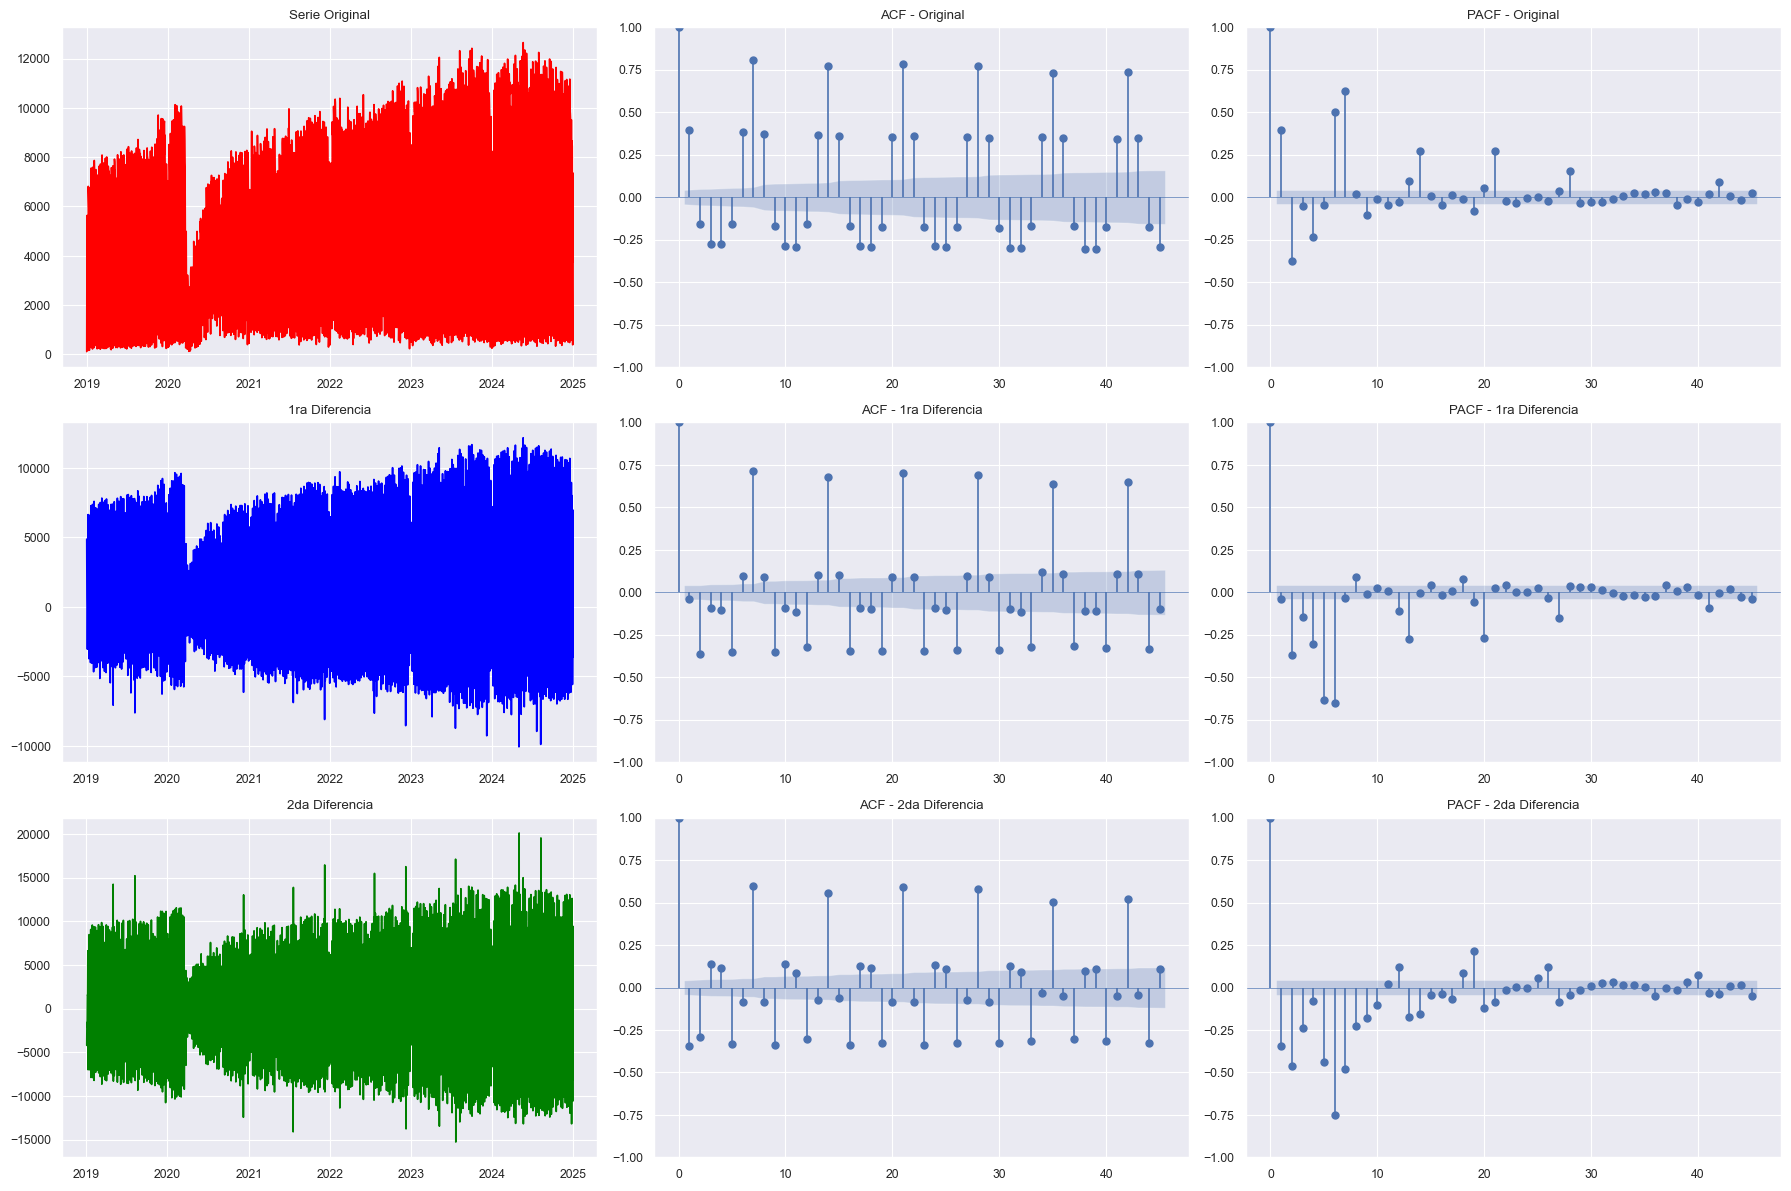

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Asegúrate de tener tu DataFrame cargado
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Agrupar por fecha y sumar la cantidad diaria
serie_global = df10.groupby(df10['FECHA_ATENCION'].dt.date)['Cantidad'].sum()
serie_global.index = pd.to_datetime(serie_global.index)

# Número de rezagos a graficar
nlag = 45

# Series diferenciadas
serie_0 = serie_global
serie_1 = serie_0.diff().dropna()
serie_2 = serie_1.diff().dropna()

# Crear los subgráficos
fig, axes = plt.subplots(3, 3, figsize=(18, 12))

# Serie original
axes[0, 0].plot(serie_0, color='red')
axes[0, 0].set_title('Serie Original')
plot_acf(serie_0.dropna(), lags=nlag, ax=axes[0, 1], linewidth=0.5)
axes[0, 1].set_title('ACF - Original')
plot_pacf(serie_0.dropna(), lags=nlag, ax=axes[0, 2], linewidth=0.5, method='ywm')
axes[0, 2].set_title('PACF - Original')

# 1ra diferencia
axes[1, 0].plot(serie_1, color='blue')
axes[1, 0].set_title('1ra Diferencia')
plot_acf(serie_1, lags=nlag, ax=axes[1, 1], linewidth=0.5)
axes[1, 1].set_title('ACF - 1ra Diferencia')
plot_pacf(serie_1, lags=nlag, ax=axes[1, 2], linewidth=0.5, method='ywm')
axes[1, 2].set_title('PACF - 1ra Diferencia')

# 2da diferencia
axes[2, 0].plot(serie_2, color='green')
axes[2, 0].set_title('2da Diferencia')
plot_acf(serie_2, lags=nlag, ax=axes[2, 1], linewidth=0.5)
axes[2, 1].set_title('ACF - 2da Diferencia')
plot_pacf(serie_2, lags=nlag, ax=axes[2, 2], linewidth=0.5, method='ywm')
axes[2, 2].set_title('PACF - 2da Diferencia')

plt.tight_layout()
plt.show()

En el gráfico anterior se observa el análisis de la serie temporal Cantidad en su forma original, con su primera y segunda diferencia, junto con las funciones de autocorrelación (ACF) y autocorrelación parcial (PACF).

🔴 La serie original muestra variaciones amplias en magnitud y una tendencia ascendente en ciertos tramos, con presencia de grandes picos y cambios abruptos. La función ACF decrece lentamente, lo que indica no estacionariedad. La PACF presenta varios rezagos significativos, confirmando la presencia de autocorrelación estructurada.

🔵 La primera diferencia estabiliza la serie alrededor de una media constante, eliminando parte de la tendencia. Tanto la ACF como la PACF muestran una caída rápida tras los primeros rezagos, lo que sugiere que la serie se vuelve estacionaria tras una sola diferenciación. Esto sugiere que un modelo ARIMA con d = 1 podría ser apropiado.

🟢 La segunda diferencia mantiene la estacionariedad, pero introduce mayor ruido y variabilidad visual sin una mejora significativa en la estructura de autocorrelación. Esto sugiere una posible sobrediferenciación, por lo que no sería recomendable aplicar dos diferencias. La serie pierde parte de su estructura útil para el modelado.

✅ En resumen, la serie Cantidad se vuelve estacionaria con una sola diferenciación, lo cual permite aplicar modelos ARIMA(𝑝,1,𝑞) de forma adecuada para el análisis y la predicción.

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">📆 Descomposición estacional 📋 </p>  

In [49]:
# Asegurarse de que FECHA_ATENCION sea tipo datetime
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Agrupar por fecha (sin hora) y sumar cantidades
serie_global = df10.groupby(df10['FECHA_ATENCION'].dt.date)['Cantidad'].sum()  # Por día
#serie_global = df10.groupby(df10['FECHA_ATENCION'])['Cantidad'].sum()  # Por hora

serie_global

FECHA_ATENCION
2019-01-01     114.0
2019-01-02    4982.0
2019-01-03    5637.0
2019-01-04    4703.0
2019-01-05    1656.0
               ...  
2024-12-27    8431.0
2024-12-28    2846.0
2024-12-29     390.0
2024-12-30    7358.0
2024-12-31    3765.0
Name: Cantidad, Length: 2192, dtype: float64

¿Para qué sirve?

Separa la serie en tendencia, estacionalidad y residuales. Con el código de abajo, se ha generado es una descomposición estacional clásica de la serie de tiempo, que es muy útil como paso exploratorio previo al modelado ARIMA.

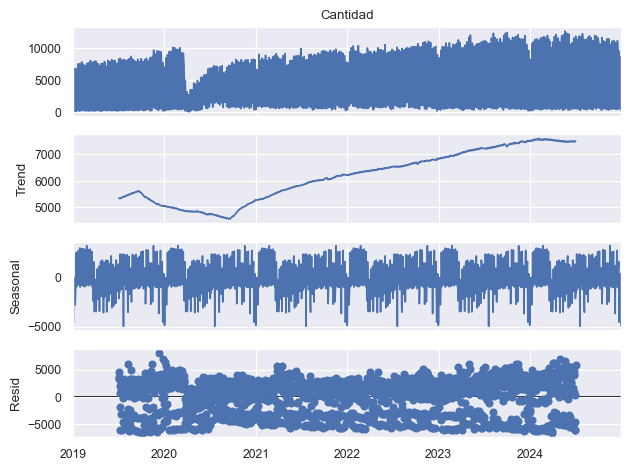

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose

descomp = seasonal_decompose(serie_global, model='additive', period=365)  # o 30 para mensual
descomp.plot()
plt.tight_layout()
plt.show()

### 📊 ¿Qué muestra cada componente?

- Cantidad (Original): Es la serie original que estás analizando.

- Trend (Tendencia): Captura la evolución a largo plazo. En nuestro caso, se observa un incremento gradual en la tendencia, con caídas bruscas que podrían relacionarse con eventos externos (como pandemia o crisis).

- Seasonal (Estacionalidad): Representa patrones repetitivos (diarios, semanales, etc.).

    - Aquí el componente estacional está prácticamente plano, lo que sugiere que no hay una estacionalidad clara de 7 días.

    - No hay estacionalidad clara, por lo tanto modelo ARIMA en lugar de SARIMA.

- Resid (Residuos): Lo que queda después de eliminar la tendencia y estacionalidad. Idealmente deberían parecer ruido blanco. En el gráfico, hay periodos de mayor dispersión, indicando eventos atípicos.

### 🕒 ¿Se incluye en el Data Challenge?

- Sí, pero como parte del análisis exploratorio, justo antes del modelado ARIMA. Sirve para:

    - Justificar si necesitas o no componente estacional (seasonal=True) en ARIMA/SARIMA.

    - Identificar la presencia de tendencia, lo cual apoya la inclusión del parámetro d=1.

    - Evaluar si hay patrones que podrían ser modelados con componentes adicionales (intervenciones, estacionalidad, etc.).

### ✅ Interpretación para incluir en el reporte:

- Antes de ajustar el modelo ARIMA, se realizó una descomposición estacional aditiva con periodo semanal (7 días). 

- El componente de tendencia mostró un comportamiento ascendente a lo largo de los años, reflejando un aumento progresivo en el número de registros diarios. 

- Sin embargo, el componente estacional fue prácticamente plano, lo cual indica que no existe una estacionalidad semanal significativa. 

- Por tanto, se justificó utilizar un modelo ARIMA no estacional. Los residuos mostraron picos de variabilidad en ciertos periodos, sugiriendo posibles eventos o rupturas estructurales.

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">⚙️ Modelo aditivo (código de Keyla Alba) 📋 </p>  

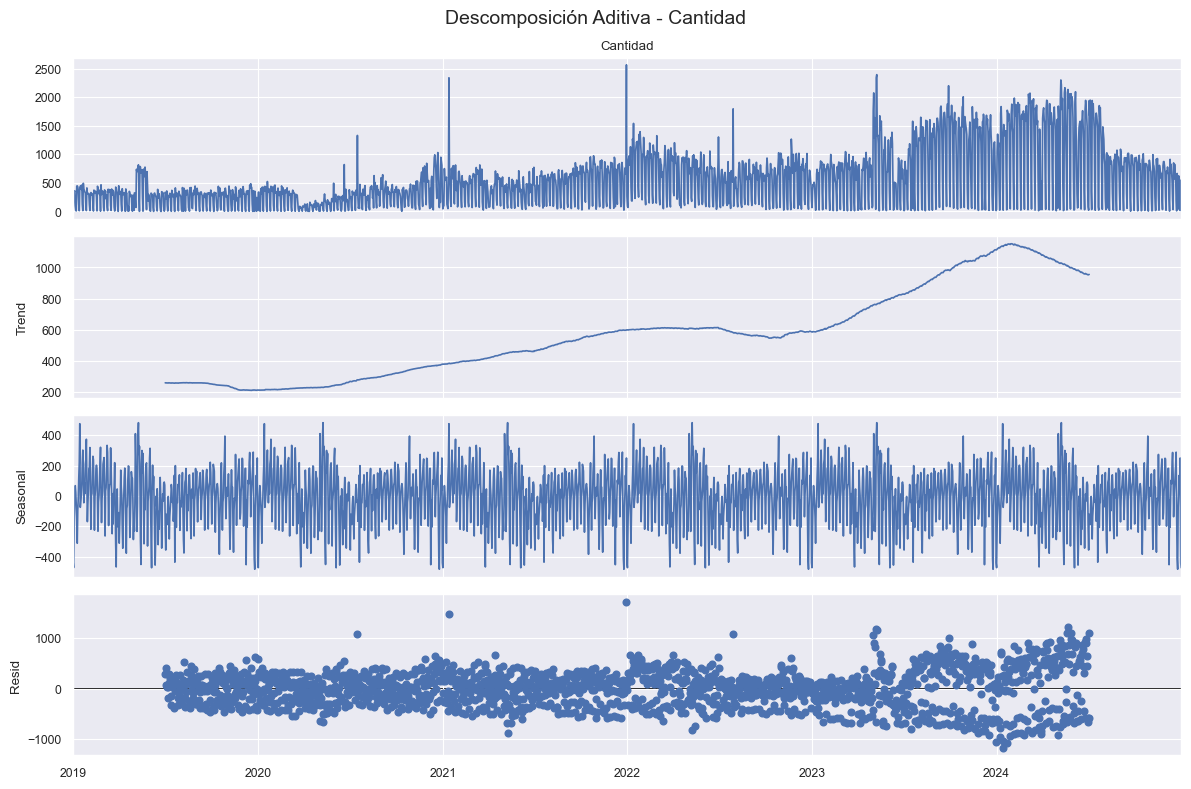

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Asegúrate de tener df10 cargado
serie = df10.copy()

# Conversión de fecha e indexado
serie['FECHA_ATENCION'] = pd.to_datetime(serie['FECHA_ATENCION'])
serie = serie.groupby('FECHA_ATENCION')['Cantidad'].sum().reset_index()
serie.set_index('FECHA_ATENCION', inplace=True)

# Establecer frecuencia diaria e interpolar valores faltantes
serie = serie.asfreq('D')
serie['Cantidad'] = serie['Cantidad'].interpolate(method='linear')

# Descomposición aditiva (periodo ~365 días para patrones anuales)
decompose_add = seasonal_decompose(serie['Cantidad'], model='additive', period=365)

# Visualización
fig_add = decompose_add.plot()
fig_add.set_size_inches(12, 8)
fig_add.suptitle('Descomposición Aditiva - Cantidad', fontsize=14)
plt.tight_layout()
plt.show()

La descomposición aditiva de la serie Cantidad permite identificar tres componentes clave: tendencia, estacionalidad y residuo.

- La serie observada muestra un crecimiento general en el volumen de eventos atendidos a lo largo del tiempo, con picos pronunciados y aumentos graduales, especialmente entre 2022 y mediados de 2024, seguidos de una leve reducción hacia el cierre del periodo.

- La tendencia suavizada revela un comportamiento ascendente sostenido a partir de mediados de 2020, lo cual puede estar asociado a un incremento en la demanda de servicios o cambios operativos institucionales. Esta tendencia alcanza su punto máximo en 2024 antes de mostrar una ligera caída.

- La componente estacional muestra fluctuaciones frecuentes con cierta regularidad semanal (periodo = 7 días), con amplitudes que alcanzan los ±250. Aunque no es tan suave como en series financieras, sí evidencia patrones repetitivos que podrían corresponder con la operación de los servicios por días laborales o ciclos administrativos.

- El componente de residuo contiene variaciones no explicadas por la tendencia ni por la estacionalidad, incluyendo varios picos significativos, especialmente a partir de 2022. Esto podría reflejar eventos inesperados o atípicos (por ejemplo, campañas especiales, cambios normativos o alteraciones operativas).

<a id="5"></a>
# <p style="padding:10px;background-color:#4A235A ;margin:0;color:#E2EEF3;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> ⚙️ ARIMA (p,d,q) con  código de Keyla Alba🔍</p>  

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">📌 Búsqueda automática de parámetros con código de Keyla Alba 📋 </p>  

In [52]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Asegurarse de que FECHA_ATENCION sea tipo datetime
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Agrupar por fecha (sin hora) y sumar cantidades
serie_global = df10.groupby(df10['FECHA_ATENCION'].dt.date)['Cantidad'].sum()  # Por día
#serie_global = df10.groupby(df10['FECHA_ATENCION'])['Cantidad'].sum()  # Por hora

# Lista para almacenar los resultados
aicVal = []

# Conversión de la serie a lista numérica sin valores NaN
datos = serie_global.dropna().tolist()

# Evaluar modelos ARIMA(p,d,q) con p y q de 0 a 2 y d en {0,1}
for d in range(0, 2):  # d = 0 o 1
    for p in range(0, 3):  # AR
        for q in range(0, 3):  # MA
            try:
                modelo = ARIMA(datos, order=(p, d, q))
                resultado = modelo.fit()
                aicVal.append([p, d, q, resultado.aic])
            except:
                pass

# Convertir los resultados en un DataFrame para análisis
data_AIC = pd.DataFrame(aicVal, columns=['AR(p)', 'D(d)', 'MA(q)', 'AIC']).sort_values(by='AIC')
print(data_AIC)

    AR(p)  D(d)  MA(q)           AIC
17      2     1      2  41124.516541
16      2     1      1  41405.289134
8       2     0      2  41546.776883
7       2     0      1  41551.095959
6       2     0      0  41572.920916
14      1     1      2  41582.328894
11      0     1      2  41591.405476
5       1     0      2  41644.195008
1       0     0      1  41664.573154
4       1     0      1  41669.809735
2       0     0      2  41674.707942
13      1     1      1  41834.990539
3       1     0      0  41904.499096
10      0     1      1  42123.360220
15      2     1      0  42349.035561
12      1     1      0  42665.079228
9       0     1      0  42666.298100
0       0     0      0  56950.114183


In [53]:
print('Mejores parámetros ARIMA según AIC:\n')
data_AIC[data_AIC.AIC == data_AIC.AIC.min()]

Mejores parámetros ARIMA según AIC:



,AR(p),D(d),MA(q),AIC
17,2,1,2,41124.516541


### 📌 Interpretación del Resultado: ARIMA(2, 1, 2)

El resultado indica que el modelo ARIMA(2, 1, 2) es el que presenta el menor valor de AIC (Akaike Information Criterion) entre todos los modelos evaluados. A continuación te explico lo que significa cada parte y cómo interpretarlo:

- AR(p) = 2: El modelo incluye dos términos autorregresivos, lo que significa que la predicción actual depende de los valores observados en los dos periodos anteriores.

- D(d) = 1: Se ha aplicado una primera diferencia a la serie original para hacerla estacionaria. Este valor es coherente con las pruebas previas (ADF y ACF/PACF), que indicaban que una sola diferenciación era suficiente para estabilizar la media.

- MA(q) = 2: Se incorporan dos términos de media móvil, es decir, se consideran los errores de los dos últimos periodos para corregir las predicciones.

- AIC = 41124.52: Este valor representa el equilibrio entre el ajuste del modelo y su complejidad. Cuanto más bajo sea el AIC, mejor es el modelo en términos de ajuste penalizado por el número de parámetros. Aquí, ARIMA(2,1,2) fue el mejor modelo dentro de la grilla evaluada.


### ✅ Conclusión

- El modelo ARIMA(2,1,2) es una opción adecuada y parsimoniosa para modelar tu serie temporal.

- Tiene un número razonable de parámetros y respeta la condición de d = 1, que como vimos antes, es suficiente para lograr estacionariedad según ADF.

- Puede considerarse para pronóstico, análisis residual y validación posterior (estacionariedad de residuos, autocorrelación, normalidad, etc.).

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">📌 Estimando ARIMA (2,1,2) con código de Keyla Alba 📋 </p>  

In [54]:
# Crear una copia para no modificar el original
df11 = df10.copy()

In [55]:
filas, columnas = df11.shape
print(f"Número de filas: {filas}")
print(f"Número de columnas: {columnas}")

Número de filas: 9984660
Número de columnas: 26


In [56]:
for col in df11.columns:
    print(col)

Nombre_Oficina_Arp
Numero_Uen_Arp
Siniestro_Arp_Id
Nombre_Sinies_Diagnosti_Princi
Siniestro_Diagnosti_Princi_Id
Nombre_Tipo_Atencion_Arp
DNI_IPS
Nombre_IPS
Nombre_Municipio_IPS
Nombre_Departamento_IPS
NOMBRE_SUCURSAL
NOMBRE_MUNICIPIO_SUCURSAL
NOMBRE_DEPARTAMENTO_SUCURSAL
Nombre_Municipio_Establecimiento
FECHA_ATENCION
Tipo_Llamada_Arp_Desc
TIPIFICACION
Cantidad
MUNICIPIO
HOMOLOGACION NIT
Year
Month
Day
Hour
Date
Nombre_Municipio_IPS2


In [57]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Ajustar el modelo ARIMA(2,1,2) a la columna 'Cantidad' del DataFrame df11
modelo_arima = ARIMA(df11['Cantidad'], order=(2, 1, 2))
modelo_fit = modelo_arima.fit()

# Obtener valores ajustados (fitted values) y agregar ceros iniciales por pérdida de observaciones
pred = np.append([0, 0], modelo_fit.fittedvalues.to_list())
n_first = pred.shape[0] - df11.shape[0]
df11['ARIMA'] = pred[n_first:]  # Agregar columna con los valores ajustados

# Obtener residuos y agregarlos también al DataFrame
diffval = np.append([0, 0], modelo_fit.resid)
df11['diffval'] = diffval[n_first:]  # Agregar columna de residuos

# Visualizar las últimas filas
df11.tail()

c:\Users\HLLINAS\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HLLINAS\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HLLINAS\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,Nombre_Oficina_Arp,Numero_Uen_Arp,Siniestro_Arp_Id,Nombre_Sinies_Diagnosti_Princi,Siniestro_Diagnosti_Princi_Id,Nombre_Tipo_Atencion_Arp,DNI_IPS,Nombre_IPS,Nombre_Municipio_IPS,Nombre_Departamento_IPS,...,MUNICIPIO,HOMOLOGACION NIT,Year,Month,Day,Hour,Date,Nombre_Municipio_IPS2,ARIMA,diffval
9984655,OFICINA BARRANQUILLA,519,5f1bbbea73,S066,S066,UNIDAD DE CUIDADOS INTENSIVOS,3ebb7237f0,99070b8411,CARTAGENA DE INDIAS,BOLIVAR,...,DIBULLA,25ef4f22e6,2024,12,31,21,2024-12-31,CARTAGENA DE INDIAS,1.179670,-0.179670
9984656,OFICINA BUCARAMANGA,531,551a190298,S610,S610,AMBULATORIA,5708b4378b,905d8f470c,MEDELLIN,ANTIOQUIA,...,BUCARAMANGA,3d1546fd2b,2024,12,31,21,2024-12-31,MEDELLIN,1.178868,-0.178868
9984657,OFICINA BUCARAMANGA,531,e08aad69cd,T812,T812,AMBULATORIA,5708b4378b,905d8f470c,MEDELLIN,ANTIOQUIA,...,BUCARAMANGA,3d1546fd2b,2024,12,31,21,2024-12-31,MEDELLIN,1.178216,-0.178216
9984658,OFICINA BUCARAMANGA,531,4901b6d176,S800,S800,AMBULATORIA,5708b4378b,905d8f470c,MEDELLIN,ANTIOQUIA,...,BUCARAMANGA,3d1546fd2b,2024,12,31,21,2024-12-31,MEDELLIN,1.177431,-0.177431
9984659,OFICINA MEDELLIN,215,f9bce7b761,S407,S407,QUIRURGICO HOSPITALARIO,6a4c76d167,d91efffa95,CALDAS,ANTIOQUIA,...,MEDELLIN,de29085d01,2024,12,31,22,2024-12-31,CALDAS,1.176774,-0.176774


In [58]:
filas, columnas = df11.shape
print(f"Número de filas: {filas}")
print(f"Número de columnas: {columnas}")

Número de filas: 9984660
Número de columnas: 28


In [59]:
#df11.to_excel("df11_excel_arima_keyla1.xlsx", index=False)
#df11.to_csv("df11_csv_arima_keyla1.csv", index=False)
#df11.to_csv("df11_txt_arima_keyla1.txt", sep="\t", index=False)

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">📌 Reduciendo a pocas variables ARIMA (2,1,2) con código de Keyla Alba 📋 </p>  

In [ ]:
# Cargar el archivo TXT (puede estar delimitado por comas, tabulaciones u otro carácter)
# Asegúrate del delimitador correcto: si es CSV, puede que sea ',' o ';'; si es de Excel tabulado, suele ser '\t'
#df11 = pd.read_csv('df11_txt_arima_keyla1.txt', encoding='utf-8', sep='\t', low_memory=False)  # Cambia '\t' si el delimitador es otro

FileNotFoundError: [Errno 2] No such file or directory: 'df11_txt_arima_keyla1.txt'

In [61]:
# Crear df12 seleccionando solo las columnas deseadas de df11
df12 = df11[[ 'HOMOLOGACION NIT', 'Tipo_Llamada_Arp_Desc', 'Nombre_Tipo_Atencion_Arp', 'Nombre_Municipio_IPS2', 'FECHA_ATENCION', 'Cantidad', 'ARIMA', 'diffval']].copy()

# Verificar las últimas filas
df12.tail()

,HOMOLOGACION NIT,Tipo_Llamada_Arp_Desc,Nombre_Tipo_Atencion_Arp,Nombre_Municipio_IPS2,FECHA_ATENCION,Cantidad,ARIMA,diffval
9984655,25ef4f22e6,CONTROL IPS,UNIDAD DE CUIDADOS INTENSIVOS,CARTAGENA DE INDIAS,2024-12-31 21:14:00,1.0,1.179670,-0.179670
9984656,3d1546fd2b,No info,AMBULATORIA,MEDELLIN,2024-12-31 21:31:10,1.0,1.178868,-0.178868
9984657,3d1546fd2b,No info,AMBULATORIA,MEDELLIN,2024-12-31 21:37:52,1.0,1.178216,-0.178216
9984658,3d1546fd2b,No info,AMBULATORIA,MEDELLIN,2024-12-31 21:39:57,1.0,1.177431,-0.177431
9984659,de29085d01,CONTROL IPS,QUIRURGICO HOSPITALARIO,CALDAS,2024-12-31 22:35:00,1.0,1.176774,-0.176774


In [ ]:
#df12.to_excel("df12_excel_arima_keyla2.xlsx", index=False)
#df12.to_csv("df12_csv_arima_keyla2.csv", index=False)
#df12.to_csv("df12_txt_arima_keyla2.txt", sep="\t", index=False)

In [ ]:
# Cargar el archivo TXT (puede estar delimitado por comas, tabulaciones u otro carácter)
# Asegúrate del delimitador correcto: si es CSV, puede que sea ',' o ';'; si es de Excel tabulado, suele ser '\t'
#df12 = pd.read_csv('df12_txt_arima_keyla2.txt', encoding='utf-8', sep='\t', low_memory=False)  # Cambia '\t' si el delimitador es otro

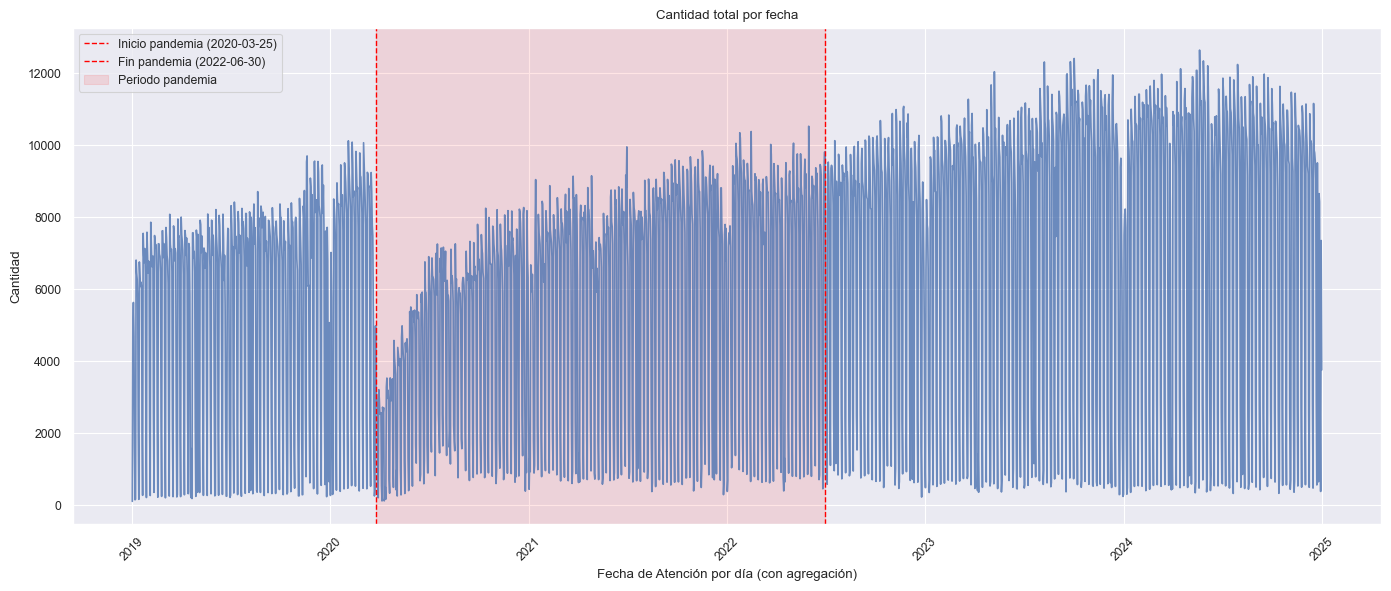

In [62]:
import pandas as pd 
import matplotlib.pyplot as plt

# Asegúrate de que la fecha esté en formato datetime
df12['FECHA_ATENCION'] = pd.to_datetime(df12['FECHA_ATENCION'])

# Agrupar por día (sin hora) y sumar la cantidad
serie_diaria = df12.groupby(df10['FECHA_ATENCION'].dt.date)['Cantidad'].sum().reset_index()
serie_diaria.columns = ['FECHA', 'Cantidad']
serie_diaria['FECHA'] = pd.to_datetime(serie_diaria['FECHA'])

# Ordenar por fecha
serie_diaria = serie_diaria.sort_values('FECHA')

# Fechas clave
inicio_pandemia = pd.to_datetime('2020-03-25')
fin_pandemia = pd.to_datetime('2022-06-30')

# Graficar
plt.figure(figsize=(14, 6))
plt.plot(serie_diaria['FECHA'], serie_diaria['Cantidad'], linestyle='-', alpha=0.8)

# Líneas verticales
plt.axvline(inicio_pandemia, color='red', linestyle='--', linewidth=1, label='Inicio pandemia (2020-03-25)')
plt.axvline(fin_pandemia, color='red', linestyle='--', linewidth=1, label='Fin pandemia (2022-06-30)')

# Sombreado del período de pandemia
plt.axvspan(inicio_pandemia, fin_pandemia, color='red', alpha=0.1, label='Periodo pandemia')

# Estética del gráfico
plt.title('Cantidad total por fecha')
plt.xlabel('Fecha de Atención por día (con agregación)')
plt.ylabel('Cantidad')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [63]:
# Asegúrate de que FECHA_ATENCION esté en formato datetime
df12['FECHA_ATENCION'] = pd.to_datetime(df12['FECHA_ATENCION'])

# Agrupar por fecha (día) y sumar Cantidad y ARIMA
serie_diaria = df12.groupby(df12['FECHA_ATENCION'].dt.date).agg({
    'Cantidad': 'sum',
    'ARIMA': 'sum'  # Asegúrate de que ARIMA tenga sentido sumado por día
}).reset_index()

# Renombrar columna
serie_diaria.columns = ['FECHA', 'Cantidad', 'ARIMA']
serie_diaria['FECHA'] = pd.to_datetime(serie_diaria['FECHA'])

serie_diaria

,FECHA,Cantidad,ARIMA
0,2019-01-01,114.0,127.797737
1,2019-01-02,4982.0,4904.996992
2,2019-01-03,5637.0,5668.055549
3,2019-01-04,4703.0,4727.823711
4,2019-01-05,1656.0,1709.967294
...,...,...,...
2187,2024-12-27,8431.0,8400.313630
2188,2024-12-28,2846.0,2854.753292
2189,2024-12-29,390.0,403.115591
2190,2024-12-30,7358.0,7375.559669


In [64]:
import plotly.graph_objects as go

# Crear gráfico interactivo
fig = go.Figure()

# Serie real
fig.add_trace(go.Scatter(
    x=serie_diaria['FECHA'],
    y=serie_diaria['Cantidad'],
    mode='lines',
    name='Cantidad (real)',
    line=dict(color='black')
))

# Serie ajustada ARIMA
fig.add_trace(go.Scatter(
    x=serie_diaria['FECHA'],
    y=serie_diaria['ARIMA'],
    mode='lines',
    name='ARIMA(2,1,2) Ajustado',
    line=dict(color='red', dash='dash')
))

# Layout
fig.update_layout(
    title='Ajuste del Modelo ARIMA(2,1,2) a la Serie Agregada por Día',
    xaxis_title='Fecha',
    yaxis_title='Cantidad Total por Día',
    template='plotly_white',
    height=500
)

fig.show()

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">📌 Graficando por semana ARIMA (2,1,2) con código de Keyla Alba 📋 </p>  

In [65]:
# Asegúrate de que FECHA_ATENCION esté en formato datetime
df12['FECHA_ATENCION'] = pd.to_datetime(df12['FECHA_ATENCION'])

# Crear una columna con el inicio de la semana (lunes) correspondiente
df12['SEMANA'] = df12['FECHA_ATENCION'].dt.to_period('W').apply(lambda r: r.start_time)

# Agrupar por semana y sumar Cantidad y ARIMA
serie_semanal = df12.groupby('SEMANA').agg({
    'Cantidad': 'sum',
    'ARIMA': 'sum'  # Asegúrate que tenga sentido sumar ARIMA por semana
}).reset_index()

# Renombrar columna si lo deseas
serie_semanal.columns = ['FECHA_SEMANA', 'Cantidad', 'ARIMA']

serie_semanal

,FECHA_SEMANA,Cantidad,ARIMA
0,2018-12-31,17249.0,17322.182466
1,2019-01-07,27720.0,27729.110157
2,2019-01-14,33816.0,33808.035178
3,2019-01-21,37515.0,37531.190461
4,2019-01-28,36978.0,36965.504538
...,...,...,...
309,2024-12-02,53246.0,53254.680396
310,2024-12-09,53456.0,53452.140520
311,2024-12-16,52942.0,52940.828402
312,2024-12-23,35765.0,35740.455531


In [66]:
import plotly.graph_objects as go

# Crear gráfico interactivo
fig = go.Figure()

# Serie real (Cantidad semanal)
fig.add_trace(go.Scatter(
    x=serie_semanal['FECHA_SEMANA'],
    y=serie_semanal['Cantidad'],
    mode='lines',
    name='Cantidad (real)',
    line=dict(color='black')
))

# Serie ajustada (ARIMA semanal)
fig.add_trace(go.Scatter(
    x=serie_semanal['FECHA_SEMANA'],
    y=serie_semanal['ARIMA'],
    mode='lines',
    name='ARIMA(2,1,2) Ajustado',
    line=dict(color='red', dash='dash')
))

# Layout
fig.update_layout(
    title='Ajuste del Modelo ARIMA(2,1,2) a la Serie Agregada por Semana',
    xaxis_title='Fecha de Inicio de Semana',
    yaxis_title='Cantidad Total por Semana',
    template='plotly_white',
    height=500
)

fig.show()

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">📌 Búsqueda automática de parámetros con `auto_arima` 📋 </p>  

In [67]:
# Asegurarse de que FECHA_ATENCION sea tipo datetime
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Crear columna de inicio de semana (lunes) correspondiente
df10['SEMANA'] = df10['FECHA_ATENCION'].dt.to_period('W').apply(lambda r: r.start_time)

# Agrupar por semana y sumar las cantidades
serie_global = df10.groupby('SEMANA')['Cantidad'].sum()

serie_global


SEMANA
2018-12-31    17249.0
2019-01-07    27720.0
2019-01-14    33816.0
2019-01-21    37515.0
2019-01-28    36978.0
               ...   
2024-12-02    53246.0
2024-12-09    53456.0
2024-12-16    52942.0
2024-12-23    35765.0
2024-12-30    11123.0
Name: Cantidad, Length: 314, dtype: float64

Usa la librería `pmdarima` para buscar automáticamente los mejores parámetros (según AIC/BIC):

In [68]:
from pmdarima.arima import auto_arima

modelo_auto = auto_arima(serie_global.dropna(), seasonal=False, trace=True)
print(modelo_auto.summary())

ModuleNotFoundError: No module named 'pmdarima'


### ¿Cómo interpretar el output actual?

- El modelo final sugerido es ARIMA(2,1,5), con:

- 2 términos autorregresivos (AR)

- 1 diferenciación (d)

- 5 términos de media móvil (MA)

- La mayoría de los coeficientes son significativos (p < 0.05), lo cual respalda la validez del modelo. Además:

- El AIC = 40576.734 indica la calidad del ajuste (más bajo = mejor).

- La prueba de Ljung-Box (Prob(Q)=0.91) sugiere que los residuos son ruido blanco → buen ajuste.

- La prueba Jarque-Bera (p=0.00) sugiere que los residuos no siguen una distribución normal, pero esto no necesariamente invalida el modelo, especialmente en series grandes.

### Observación

- Aunque previamente aplicamos la prueba de Dickey-Fuller y obtuvimos un p-valor de 0.0014, lo cual indica estacionariedad, el modelo ARIMA sugerido por auto_arima tiene un valor de d=1, lo que implica que aplicó una diferenciación para alcanzar la estacionariedad.

### ¿Por qué ocurre esto?

- `auto_arima` aplica su propio test interno (por ejemplo, KPSS o ADF) y a veces prefiere ser conservador y asumir una diferenciación adicional (d=1) para asegurar estacionariedad, sobre todo si la serie muestra tendencias suaves o no es estrictamente estacionaria en media.

### ¿Qué hacer?

Hay dos opciones:

### ✅ Opción 1: Aceptar el modelo propuesto

- El modelo ARIMA(2,1,5) fue seleccionado como el mejor según el AIC.

- Si el modelo tiene buen ajuste (residuos ~ ruido blanco), puedes seguir con él.

### 🔍 Opción 2: Forzar d=0 manualmente

Esto te permite comparar ambos modelos (con y sin diferenciación).

Si el modelo con d=0 tiene AIC similar y residuos adecuados, podrías preferirlo.

In [ ]:
modelo_d0 = auto_arima(serie_global.dropna(), d=0, seasonal=False, trace=True)
print(modelo_d0.summary())

### 📌 Recomendación Final

- Seguir con ARIMA(2,1,5) si:

- El diagnóstico de residuos es aceptable.

- Si se quiere seguir el criterio de auto_arima basado en AIC.

- Sin embargo, si el objetivo es un modelo más parsimonioso y teórico (basado en pruebas de raíz unitaria), puedes probar también con ARIMA(2,0,5) y comparar AIC/BIC/residuos.

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">📌 Comparación ARIMA(5,0,1) vs ARIMA(2,1,5) 📋 </p>  

In [ ]:
from IPython.display import Image, display

# Mostrar imagen
display(Image(filename='Comparacion_ARIMA.png'))

In [ ]:
import plotly.graph_objects as go

header = ['Criterio', 'ARIMA(5,0,1)', 'ARIMA(2,1,5)']
rows = [
    ['Modelo', 'ARIMA(5, 0, 1)', 'ARIMA(2, 1, 5)'],
    ['AIC', '✅ 41058.52', '❌ 40576.73 (mejor, pero contradice ADF)'],
    ['BIC', '✅ 41098.37', '❌ 40622.27'],
    ['Estacionariedad', '✅ d = 0 (coherente con ADF)', '❌ d = 1 (contradice ADF)'],
    ['Coef. significativos', '✅ Sí', '✅ Sí'],
    ['Advertencia covarianza', '⚠️ Sí, matriz casi singular', '✅ No'],
    ['Ljung-Box (residuos)', '✅ Prob(Q) = 0.09 (no autocorr)', '✅ Prob(Q) = 0.91 (aceptable)'],
    ['Jarque-Bera (normalidad)', '❌ JB = 40.36, p = 0.00', '❌ JB = 293.55, p = 0.00']
]

fig = go.Figure(data=[go.Table(
    header=dict(values=header, fill_color='lightgray', align='left'),
    cells=dict(values=[list(col) for col in zip(*rows)],
               fill_color='white',
               align='left'))
])

fig.update_layout(width=1000, height=400)
fig.show()


### 📉 Interpretación del modelo ARIMA(5,0,1):

- Todos los coeficientes AR y MA son estadísticamente significativos (p < 0.05).

- La serie fue modelada como estacionaria (d = 0), lo cual es coherente con la prueba de Dickey-Fuller previa.

- No hay autocorrelación remanente significativa (Ljung-Box Prob(Q) = 0.09 > 0.05), lo cual indica un buen ajuste.

- Sin embargo, hay una advertencia sobre la matriz de covarianza, indicando posible multicolinealidad entre los parámetros o un sobreajuste.

### ✅ Conclusión final: ¿Cuál modelo elegir?

- El modelo ARIMA(5,0,1) es más coherente con el análisis previo, especialmente con:

- La prueba de estacionariedad (ADF),

- Y la parsimonia (modelo más simple en términos de diferencias).

- Aunque el ARIMA(2,1,5) tiene mejor AIC/BIC, viola el supuesto de estacionariedad al forzar una diferenciación innecesaria.

### 🟩 Recomendación: 

- Usar ARIMA(5,0,1) como modelo final para el Data Challenge.

- Sugerencia adicional: 
    - En el informe, se puede mencionar que se compararon varios modelos y que se priorizó la coherencia estadística y la validez teórica sobre una ligera mejora en el AIC/BIC.

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">📈 El modelo ARIMA (5,0,1) 📋 </p>  

### ✅ Solución paso a paso

Si nuestro mejor modelo es el ARIMA(5,0,1), podemos definirlo manualmente con SARIMAX de `statsmodels` y luego hacer la predicción así:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Simulación de la serie (reemplazar esto por tu serie real: serie_global)
np.random.seed(42)
fechas = pd.date_range(start="2019-01-01", periods=2192, freq='D')
valores = np.random.poisson(lam=5000, size=2192) + np.linspace(0, 3000, 2192)
serie_global = pd.Series(valores, index=fechas)
serie_global.index.freq = 'D'

# Ajustar modelo ARIMA(5,0,1)
model = ARIMA(serie_global, order=(5, 0, 1))
model_fit = model.fit()

# Pronóstico para 30 días
forecast = model_fit.get_forecast(steps=30)
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Índice para los pronósticos
forecast_index = pd.date_range(start=serie_global.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')

# Graficar
plt.figure(figsize=(15, 6))
plt.plot(serie_global.index, serie_global, label="Histórico", color='blue')
plt.plot(forecast_index, predicted_mean, label="Pronóstico ARIMA(5,0,1)", color='red')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3, label='IC 95%')
plt.title('Pronóstico de eventos (ARIMA(5,0,1))')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Mostrar resumen del modelo
print(model_fit.summary())

### ✅ ¿Para qué sirve el modelo ARIMA(5,0,1)?

Este modelo te permite:

- Hacer predicciones futuras de la variable Cantidad (por ejemplo, cuántos eventos esperar mañana, la próxima semana, etc.).

- Detectar patrones ocultos en la serie temporal que no son visibles a simple vista.

- Evaluar el comportamiento estructural del sistema antes, durante y después de eventos relevantes (como la pandemia).

- Comparar escenarios y anticipar cambios operativos o de demanda en función de la evolución histórica.

### 📈 ¿Qué hace el modelo ARIMA(5,0,1)?

Nuestro modelo tiene estos componentes:

- p = 5 (autoregresivo): utiliza los últimos 5 valores pasados para predecir el siguiente.

- d = 0 (no hay diferenciación): la serie ya es estacionaria, así que no necesita transformarse.

- q = 1 (promedio móvil): corrige el error de predicción con base en el último error cometido.

### En resumen: ARIMA(5,0,1) dice:

- “Predigo la Cantidad de hoy usando los últimos 5 días + el error cometido ayer.”

### 🔁 ¿Qué puedes hacer con este modelo?

1. Hacer pronósticos

In [ ]:
pred = modelo_arima.predict(n_periods=30)  # predicción para 30 días futuros
print(pred)

In [ ]:
import pandas as pd  
import matplotlib.pyplot as plt

# Asegurarse de que la fecha esté en formato datetime
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Fechas clave de la pandemia
inicio_pandemia = pd.to_datetime('2020-03-25')
fin_pandemia = pd.to_datetime('2022-06-30')

# Lista de tipos de atención únicos (excluye NaN)
tipos_atencion = df10['Nombre_Tipo_Atencion_Arp'].dropna().unique()

# Bucle por cada tipo de atención
for tipo in tipos_atencion:
    # Filtrar datos por tipo de atención
    df_tipo = df10[df10['Nombre_Tipo_Atencion_Arp'] == tipo]

    # Agrupar por fecha y sumar la cantidad
    serie_diaria = df_tipo.groupby('FECHA_ATENCION')['Cantidad'].sum().reset_index()
    serie_diaria = serie_diaria.sort_values('FECHA_ATENCION')

    # Graficar
    plt.figure(figsize=(14, 6))
    plt.plot(serie_diaria['FECHA_ATENCION'], serie_diaria['Cantidad'], linestyle='-', alpha=0.8)

    # Líneas y sombreado del período de pandemia
    plt.axvline(inicio_pandemia, color='red', linestyle='--', linewidth=1, label='Inicio pandemia (2020-03-25)')
    plt.axvline(fin_pandemia, color='red', linestyle='--', linewidth=1, label='Fin pandemia (2022-06-30)')
    plt.axvspan(inicio_pandemia, fin_pandemia, color='red', alpha=0.1, label='Periodo pandemia')

    # Estética
    plt.title(f'Cantidad total por fecha - Tipo de Atención: {tipo}')
    plt.xlabel('Fecha de Atención por hora (con agregación)')
    plt.ylabel('Cantidad')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

<a id="5"></a>
# <p style="padding:10px;background-color:#4A235A ;margin:0;color:#E2EEF3;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Serie de tiempo por `Nombre_Municipio_IPS2`  🔍</p> 

In [ ]:
import pandas as pd  
import matplotlib.pyplot as plt

# Asegúrate de que la fecha esté en formato datetime
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Fechas de pandemia
inicio_pandemia = pd.to_datetime('2020-03-25')
fin_pandemia = pd.to_datetime('2022-06-30')

# Lista de municipios únicos
municipios = df10['Nombre_Municipio_IPS2'].unique()

# Bucle para graficar cada municipio
for municipio in municipios:
    # Filtrar los datos del municipio
    df_muni = df10[df10['Nombre_Municipio_IPS2'] == municipio]
    
    # Agrupar por fecha y sumar la cantidad
    serie_diaria = df_muni.groupby('FECHA_ATENCION')['Cantidad'].sum().reset_index()
    serie_diaria = serie_diaria.sort_values('FECHA_ATENCION')

    # Crear la figura
    plt.figure(figsize=(14, 6))
    plt.plot(serie_diaria['FECHA_ATENCION'], serie_diaria['Cantidad'], linestyle='-', alpha=0.8)

    # Líneas y sombreado
    plt.axvline(inicio_pandemia, color='red', linestyle='--', linewidth=1, label='Inicio pandemia (2020-03-25)')
    plt.axvline(fin_pandemia, color='red', linestyle='--', linewidth=1, label='Fin pandemia (2022-06-30)')
    plt.axvspan(inicio_pandemia, fin_pandemia, color='red', alpha=0.1, label='Periodo pandemia')

    # Estética
    plt.title(f'Cantidad total por fecha - {municipio}')
    plt.xlabel('Fecha de Atención por hora (con agregación)')
    plt.ylabel('Cantidad')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
for col in df10.columns:
    print(col)

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Agrupar por fecha
serie_diaria = df.groupby(df['FECHA_ATENCION'].dt.date).size().reset_index(name='conteo')
serie_diaria.columns = ['fecha', 'conteo']
serie_diaria.set_index('fecha', inplace=True)

# Aplicar la prueba de Dickey-Fuller
resultado = adfuller(serie_diaria['conteo'])

# Mostrar resultados
print('Estadístico ADF:', resultado[0])
print('Valor p:', resultado[1])
print('Valores críticos:')
for clave, valor in resultado[4].items():
    print(f'   {clave}: {valor}')